# Libraries needed

In [23]:
import ast
import json
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [22]:
anime_data = pd.read_csv('anime_details_cleaned.csv')
anime_data['watch_rate'] = (anime_data['statistics.completed'] + anime_data['statistics.watching']) / (anime_data['statistics.completed'] + anime_data['statistics.dropped'] + anime_data['statistics.on_hold'] + anime_data['statistics.watching'])
anime_data.drop(['statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped'], axis=1, inplace=True)
anime_data.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,genres,num_episodes,source,rating,studios,start_season.year,start_season.season,statistics.plan_to_watch,statistics.num_list_users,watch_rate
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.17,1.0,612,345648,94303,white,special,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",2,manga,r,"[{'id': 569, 'name': 'MAPPA'}]",2023.0,winter,183136,345560,0.934597
1,5114,Fullmetal Alchemist: Brotherhood,9.11,2.0,3,3108741,1976421,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",64,manga,r,"[{'id': 4, 'name': 'Bones'}]",2009.0,spring,462639,3108970,0.940232
2,41467,Bleach: Sennen Kessen-hen,9.09,3.0,509,403470,182903,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",13,manga,r,"[{'id': 1, 'name': 'Pierrot'}]",2022.0,fall,134626,403434,0.972248
3,9253,Steins;Gate,9.08,4.0,13,2393155,1311891,white,tv,finished_airing,"[{'id': 8, 'name': 'Drama'}, {'id': 40, 'name'...",24,visual_novel,pg_13,"[{'id': 314, 'name': 'White Fox'}]",2011.0,spring,600304,2393301,0.924603
4,28977,Gintama°,9.07,5.0,335,581856,232873,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 4, 'name'...",51,manga,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]",2015.0,spring,236098,581860,0.884825


# Visualising relationship of mean, watch_rate and popularity

<AxesSubplot:xlabel='mean', ylabel='watch_rate'>

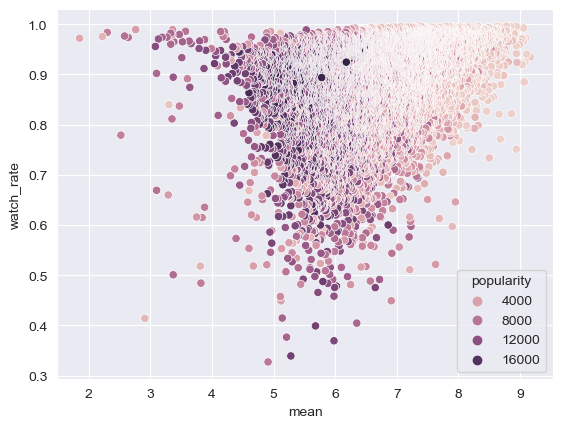

In [28]:
sb.scatterplot(data = anime_data, x = 'mean', y = 'watch_rate', hue = 'popularity')

# Spliting the dataset into training and test dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(anime_data[['mean', 'watch_rate']], anime_data[['popularity']], test_size=0.2, random_state=0)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Finding the optimal K value using silhouette score

<AxesSubplot:>

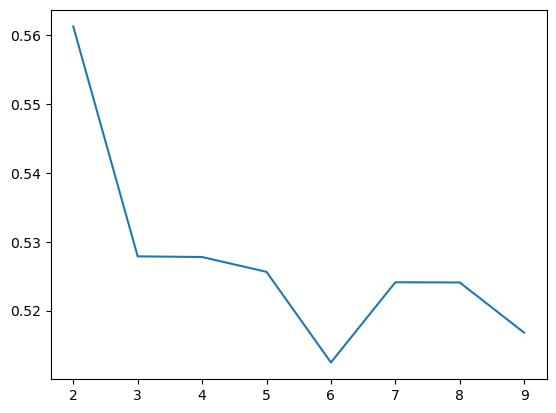

In [4]:
K = range(2, 10)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters=int(k), random_state=0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

sb.lineplot(x = K, y = score)

# Cluster the scatterplot using K=6 for training dataset

<AxesSubplot:xlabel='mean', ylabel='watch_rate'>

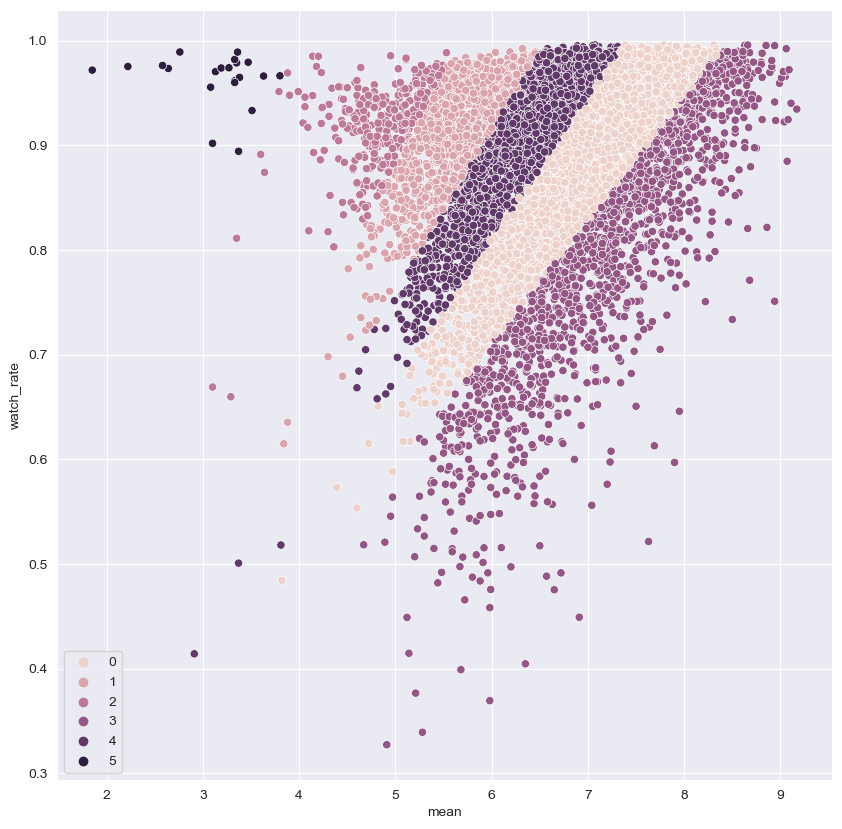

In [30]:
# convert the data to a numpy array
X_train_norm = np.array(X_train_norm)

# define the number of clusters
n_clusters = 6

# create the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)

# fit the model to the data
kmeans.fit(X_train_norm)

plt.figure(figsize=(10, 10))
sb.scatterplot(data = X_train, x = 'mean', y = 'watch_rate', hue = kmeans.labels_)

<AxesSubplot:ylabel='popularity'>

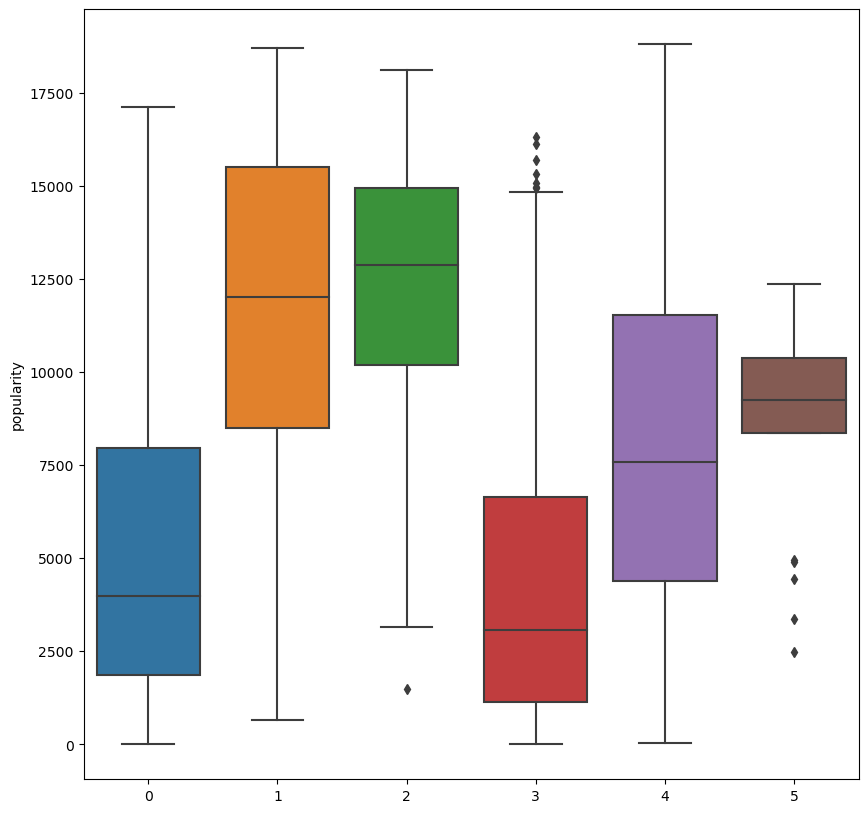

In [6]:
plt.figure(figsize=(10, 10))
sb.boxplot(x = kmeans.labels_, y = y_train['popularity'])

In [34]:
print('The Kmean clustering of training dataset with K = 6 has a silhouette score of',silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))

The Kmean clustering of training dataset with K = 6 has a silhouette score of 0.5124441148520357


# Predict the cluster of test dataset

<AxesSubplot:xlabel='mean', ylabel='watch_rate'>

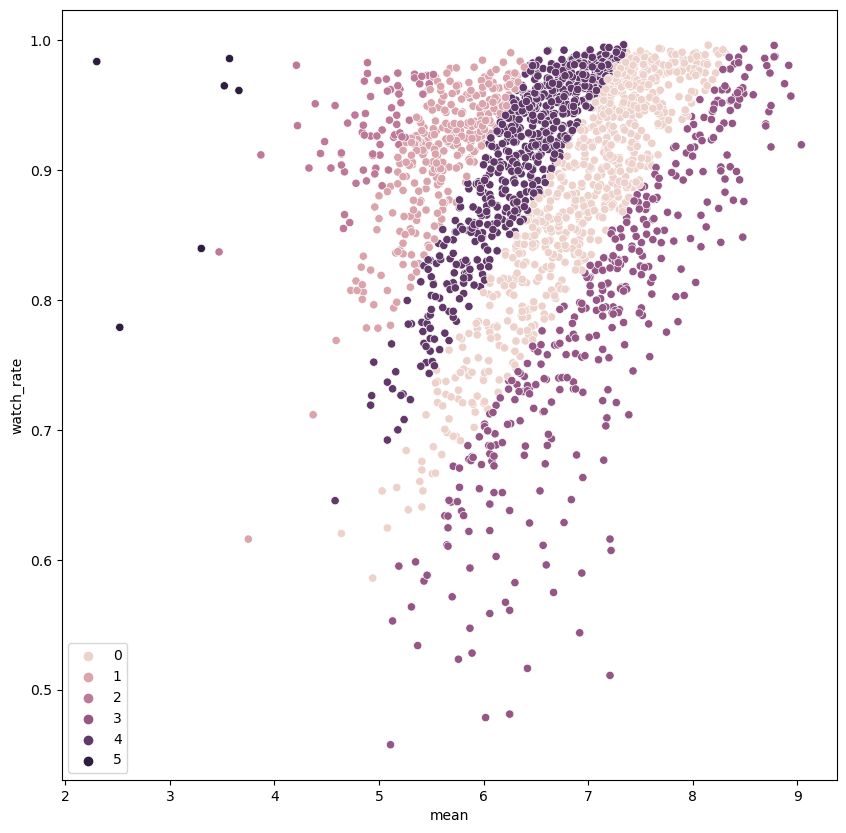

In [8]:
# convert the data to a numpy array
X_test_norm = np.array(X_test_norm)

# use the already created KMeans model to predict the clusters for the test dataset
test_labels = kmeans.predict(X_test_norm)

# visualize the clusters for the test dataset using a scatterplot
plt.figure(figsize=(10, 10))
sb.scatterplot(data = X_test, x = 'mean', y = 'watch_rate', hue = test_labels)

<AxesSubplot:ylabel='popularity'>

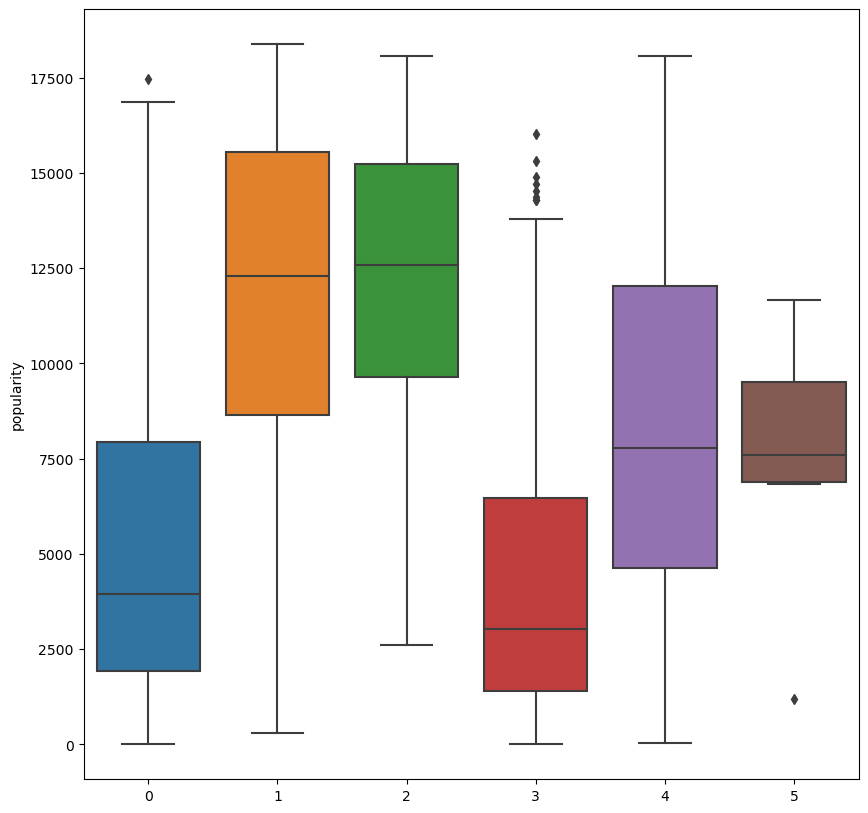

In [9]:
plt.figure(figsize=(10, 10))
sb.boxplot(x = test_labels, y = y_test['popularity'])

In [33]:
print('The Kmean clustering of test dataset with K = 6 has a silhouette score of',silhouette_score(X_test_norm, test_labels, metric='euclidean'))

The Kmean clustering of test dataset with K = 6 has a silhouette score of 0.512939922628873


# Predict the cluster for the whole anime dataset

In [11]:
# select the columns to use for clustering
X = anime_data[['mean', 'watch_rate']]

# normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# create the KMeans model
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)

# fit the model to the data
kmeans.fit(X_norm)

# predict cluster labels for the entire dataset
all_labels = kmeans.predict(X_norm)

# add the cluster labels to the dataset
anime_data['cluster'] = all_labels

anime_data.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,...,num_episodes,source,rating,studios,start_season.year,start_season.season,statistics.plan_to_watch,statistics.num_list_users,watch_rate,cluster
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.17,1.0,612,345648,94303,white,special,currently_airing,...,2,manga,r,"[{'id': 569, 'name': 'MAPPA'}]",2023.0,winter,183136,345560,0.934597,0
1,5114,Fullmetal Alchemist: Brotherhood,9.11,2.0,3,3108741,1976421,white,tv,finished_airing,...,64,manga,r,"[{'id': 4, 'name': 'Bones'}]",2009.0,spring,462639,3108970,0.940232,0
2,41467,Bleach: Sennen Kessen-hen,9.09,3.0,509,403470,182903,white,tv,finished_airing,...,13,manga,r,"[{'id': 1, 'name': 'Pierrot'}]",2022.0,fall,134626,403434,0.972248,0
3,9253,Steins;Gate,9.08,4.0,13,2393155,1311891,white,tv,finished_airing,...,24,visual_novel,pg_13,"[{'id': 314, 'name': 'White Fox'}]",2011.0,spring,600304,2393301,0.924603,0
4,28977,Gintama°,9.07,5.0,335,581856,232873,white,tv,finished_airing,...,51,manga,pg_13,"[{'id': 1258, 'name': 'Bandai Namco Pictures'}]",2015.0,spring,236098,581860,0.884825,0


In [12]:
anime_data.to_csv('anime_details_clustered.csv', index=False)

# Cluster VS Mean

In [13]:
# Create another dataframe to list out all the genres
df_genres = pd.read_csv('anime_details_clustered.csv')

# Create an empty list to store all genre names
genre_names = []

df_genres['genres'] = df_genres['genres'].str.replace("'", '"')

# Loop through each row in the 'genres' column
for genres in df_genres['genres']:
    # Check if the value in the 'genres' column is NaN or float
    if pd.isna(genres):
        # Convert NaN to an empty list
        genres_list = []
    elif isinstance(genres, float):
        # Convert float to an empty list
        genres_list = []
    else:
        # Parse the string into a list of dictionaries using the JSON module
        genres_list = json.loads(genres)
    # Loop through each dictionary in the list and append the 'name' key to the 'genre_names' list
    for genre in genres_list:
        genre_names.append(genre['name'])

# Get a set of unique genre names
unique_genres = set(genre_names)

# Loop through each unique genre name
for genre in unique_genres:
    # Create a new column with the genre name and populate it with True or False values depending on whether the genre is present in the 'genres' column for each row
    df_genres[genre] = df_genres['genres'].apply(lambda x: genre in [g['name'] for g in json.loads(x)] if isinstance(x, str) else False)

# Drop the original 'genres' column
df_genres.drop('genres', axis=1, inplace=True)

df_genres.head()

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,media_type,status,...,Adventure,Educational,Crossdressing,Strategy Game,Harem,Medical,Gore,High Stakes Game,Music,Historical
0,51535,Shingeki no Kyojin: The Final Season - Kankets...,9.17,1.0,612,345648,94303,white,special,currently_airing,...,False,False,False,False,False,False,True,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,9.11,2.0,3,3108741,1976421,white,tv,finished_airing,...,True,False,False,False,False,False,False,False,False,False
2,41467,Bleach: Sennen Kessen-hen,9.09,3.0,509,403470,182903,white,tv,finished_airing,...,True,False,False,False,False,False,False,False,False,False
3,9253,Steins;Gate,9.08,4.0,13,2393155,1311891,white,tv,finished_airing,...,False,False,False,False,False,False,False,False,False,False
4,28977,Gintama°,9.07,5.0,335,581856,232873,white,tv,finished_airing,...,False,False,False,False,False,False,False,False,False,True


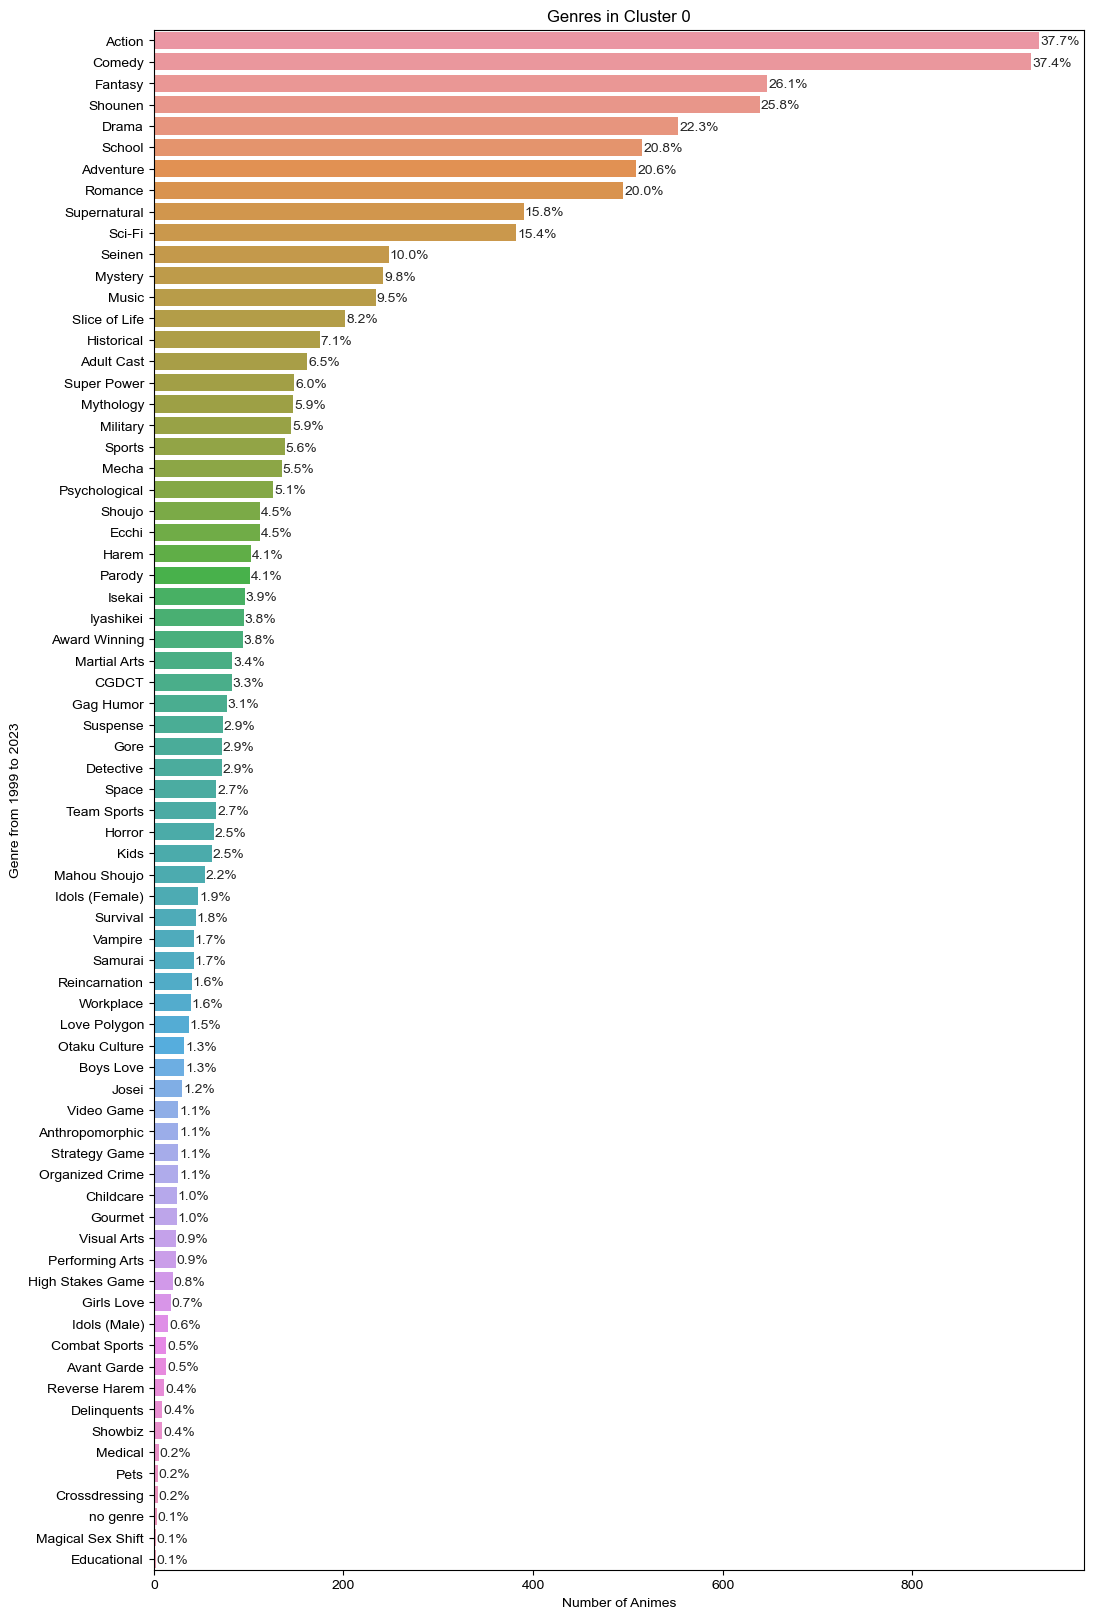

In [14]:
df_cluster_0 = df_genres[df_genres['cluster'] == 0].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_0.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 0')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_0) * 100))

plt.show()

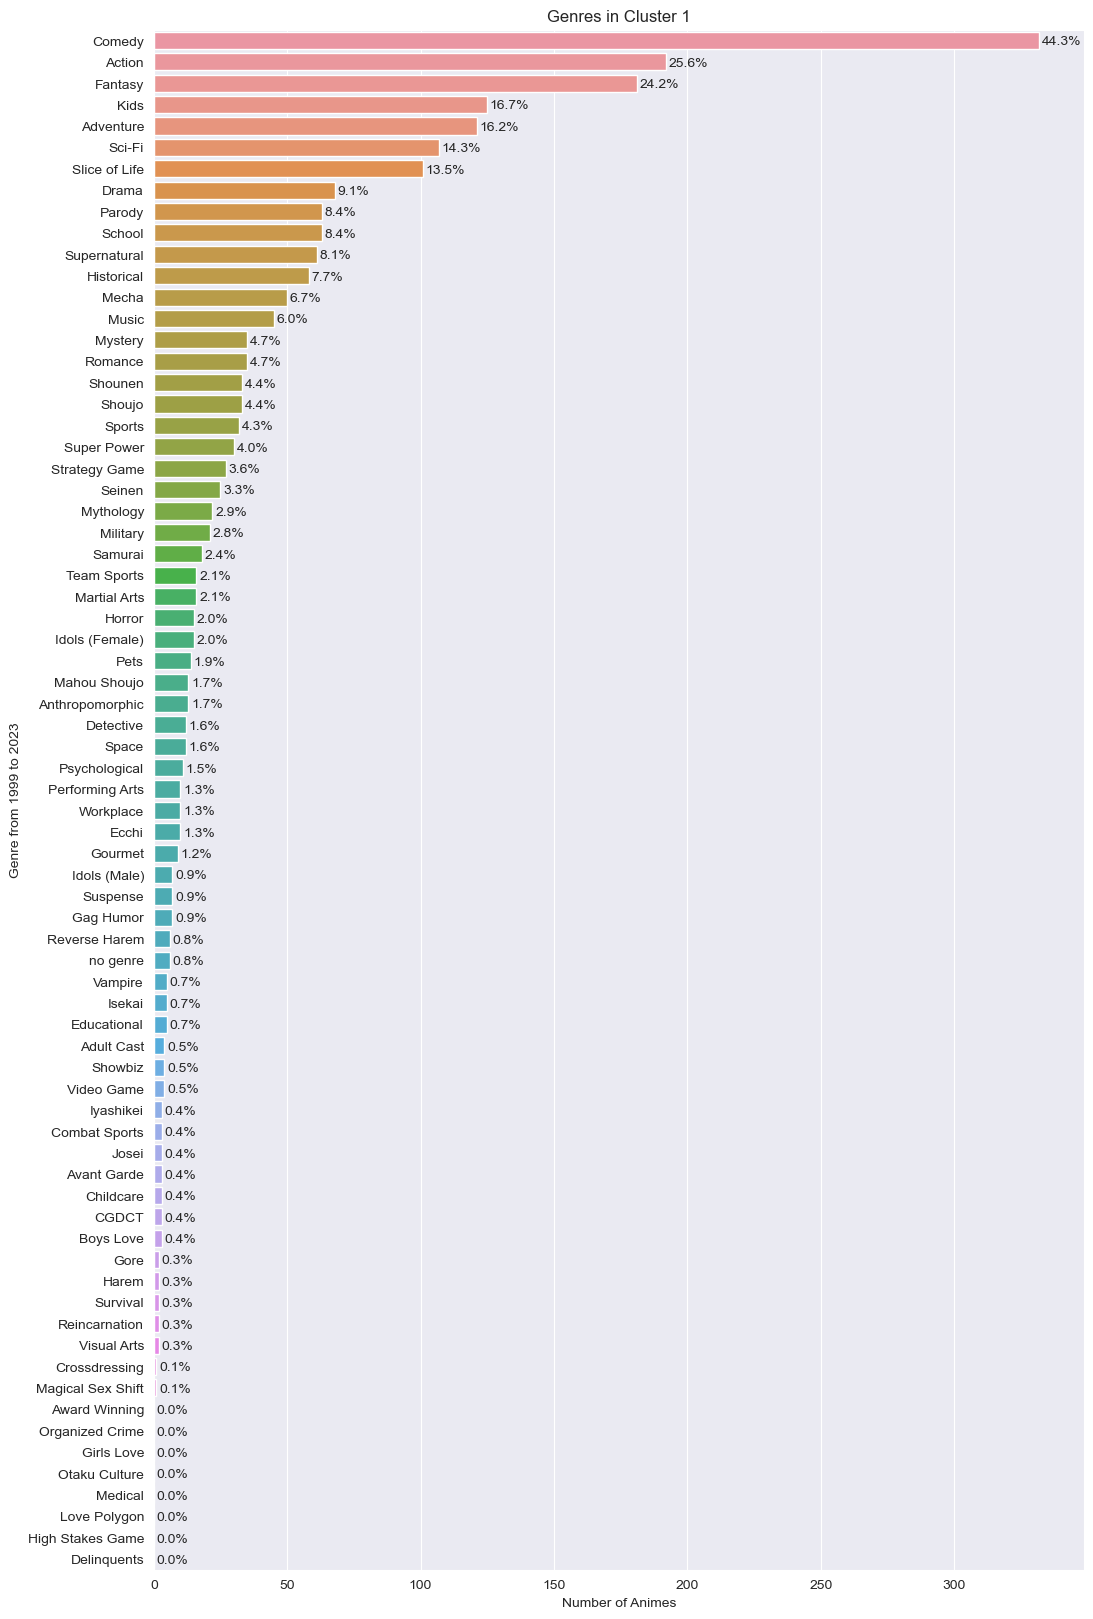

In [15]:
df_cluster_1 = df_genres[df_genres['cluster'] == 1].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_1.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 1')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_1) * 100))

plt.show()

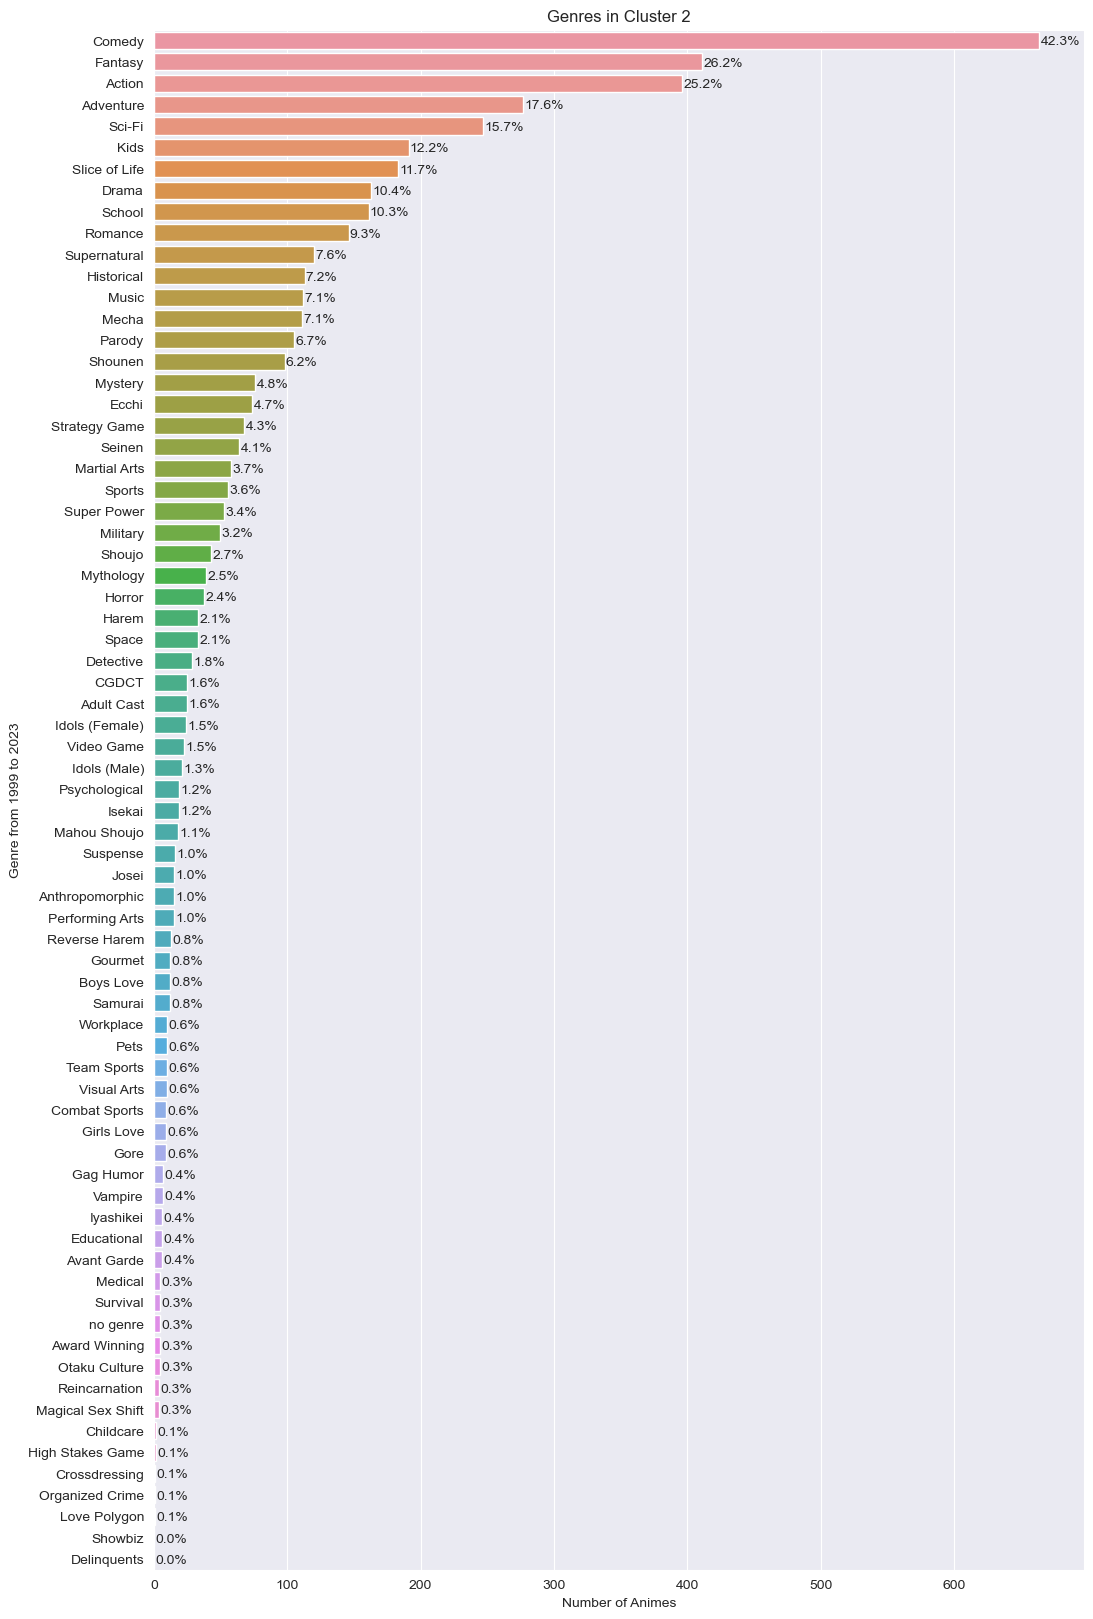

In [16]:
df_cluster_2 = df_genres[df_genres['cluster'] == 2].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_2.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 2')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_2) * 100))

plt.show()

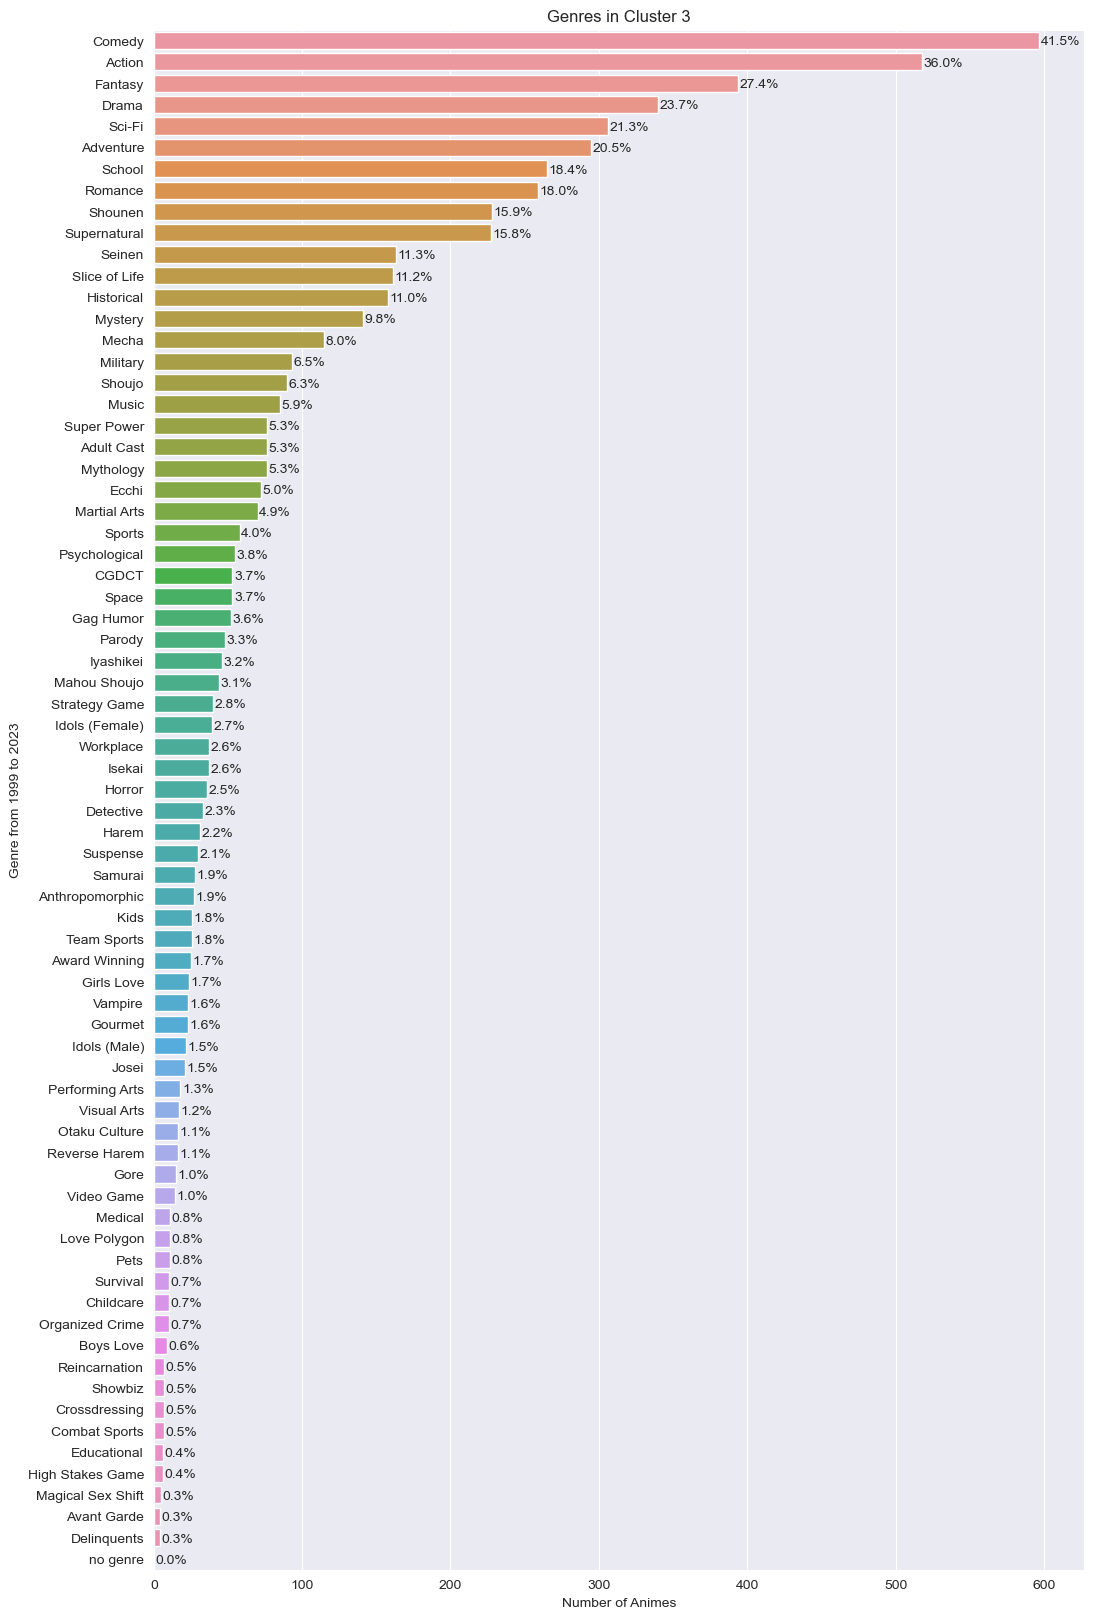

In [17]:
df_cluster_3 = df_genres[df_genres['cluster'] == 3].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_3.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 3')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_3) * 100))

plt.show()

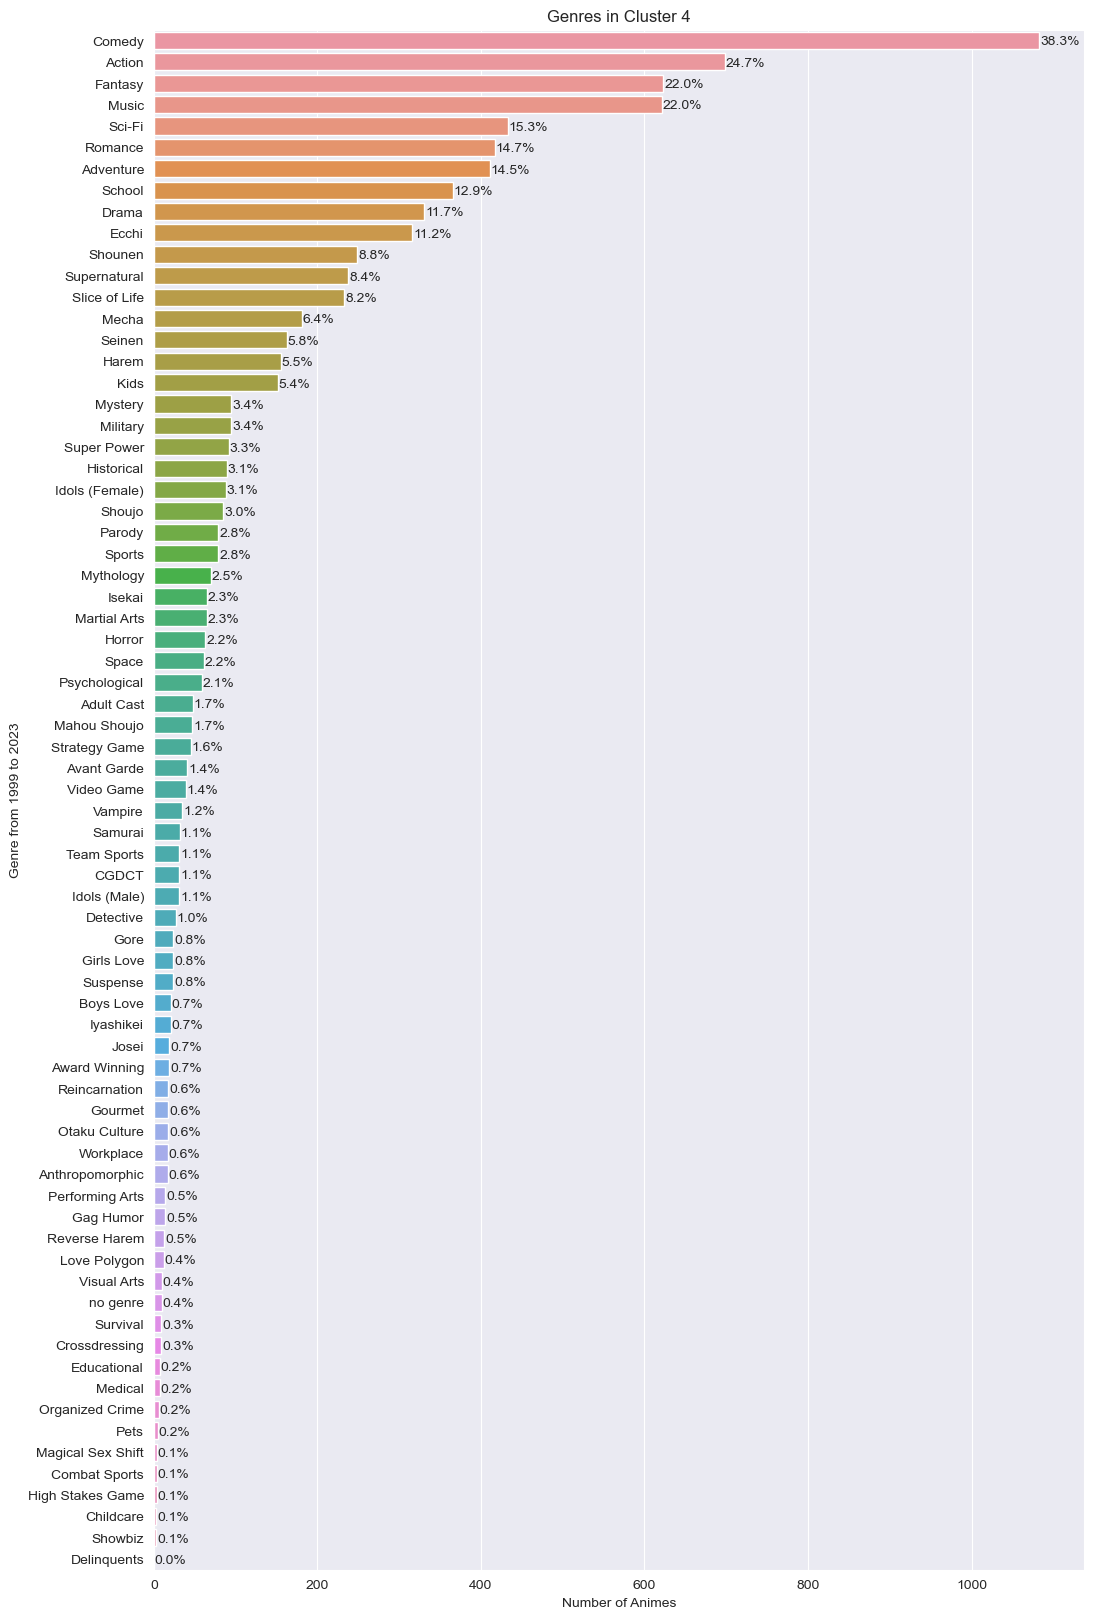

In [18]:
df_cluster_4 = df_genres[df_genres['cluster'] == 4].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_4.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 4')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_4) * 100))

plt.show()

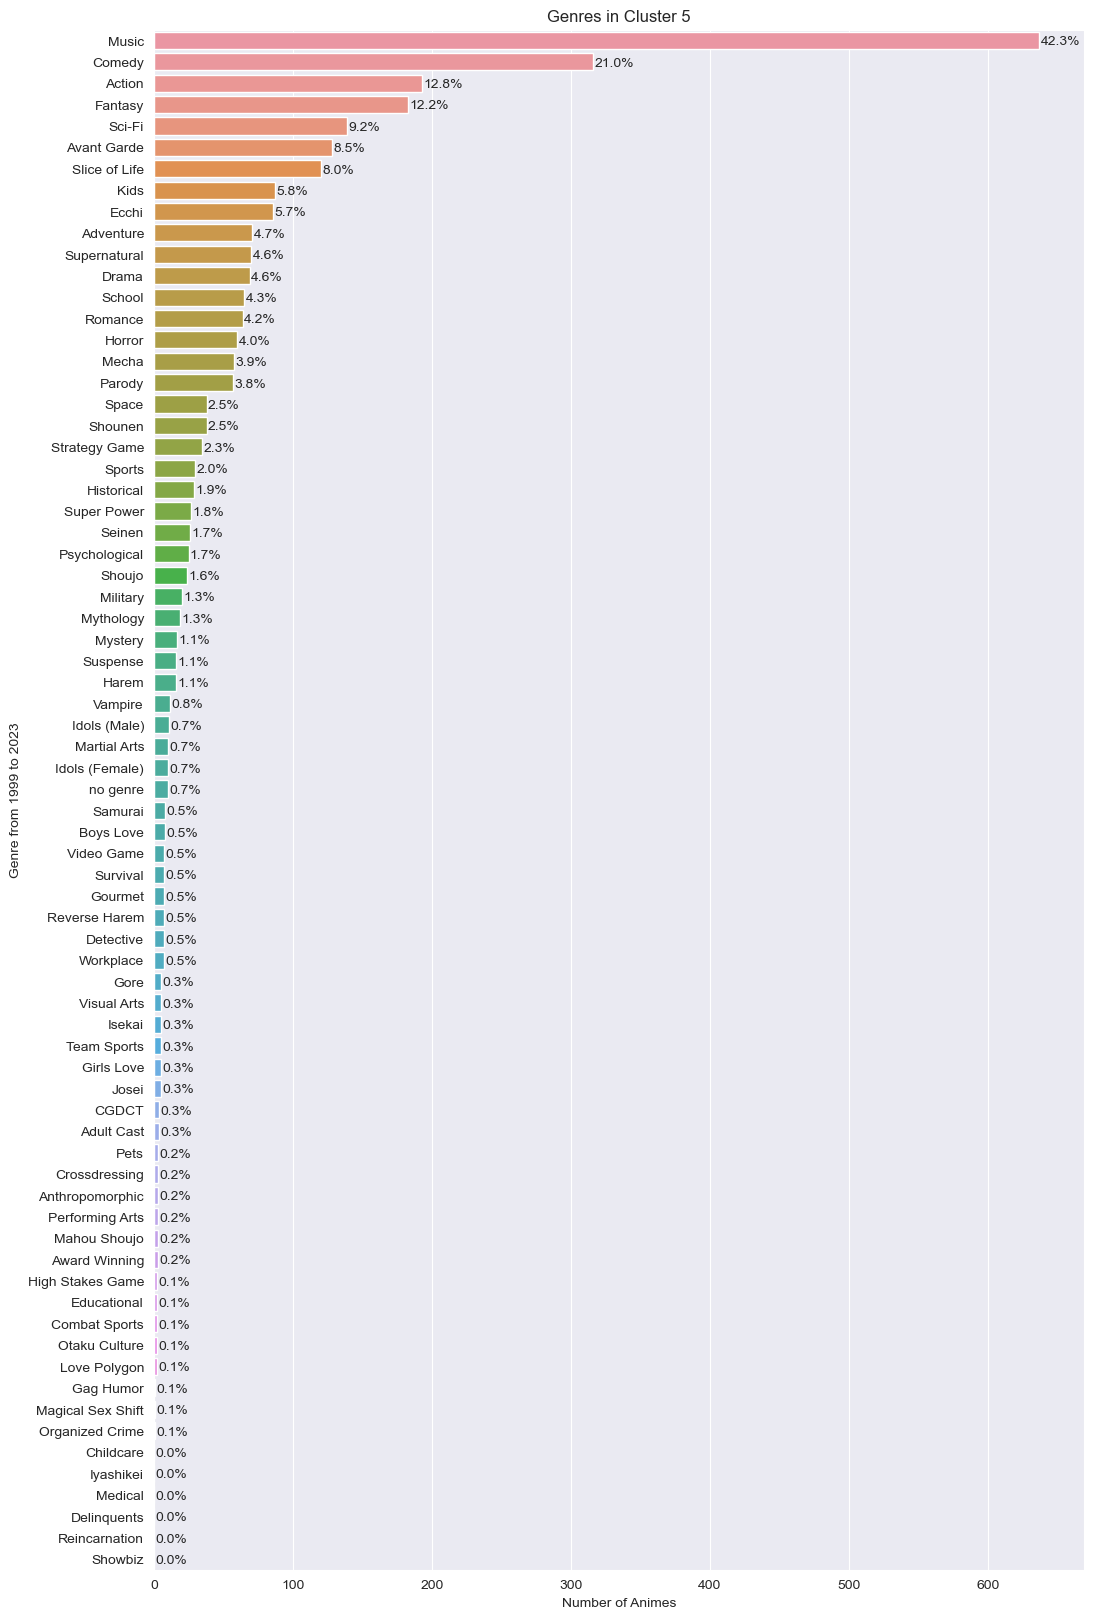

In [19]:
df_cluster_5 = df_genres[df_genres['cluster'] == 5].reset_index(drop=True)
    
# Calculate the number of animes in each genre
genre_counts = df_cluster_5.iloc[:, 23:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres in Cluster 5')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 1, i + 0.2, "%.1f%%" % (count/len(df_cluster_5) * 100))

plt.show()

<AxesSubplot:xlabel='mean', ylabel='watch_rate'>

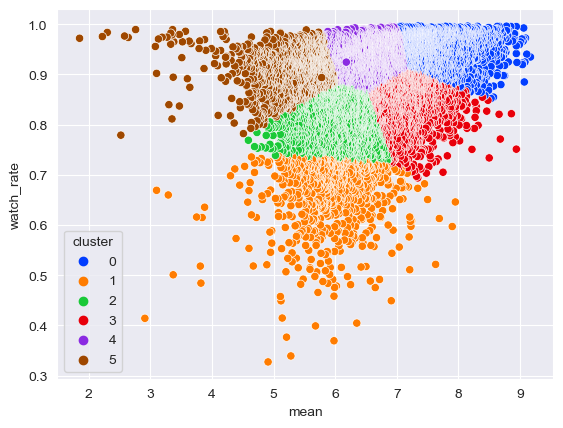

In [20]:
sb.scatterplot(data=anime_data, x='mean', y='watch_rate', hue='cluster', palette='bright')

# Visualisation of Cluster VS Mean
* All the clusters have at least 20% of the animes with the Comedy genre.
* Cluster 0, 1, 2, 3 and 4 have at least 20% of the animes with Fantasy and Action genres
* Cluster 0 and 3 have at least 20% of the animes with Adventure and Drama genres
* Cluster 4 and 5 have at least 20% of the animes with Music genre.


* Cluster 0 contains Action 37.7%, Comedy 37.4%, Fantasy 26.1%, Shounen 25.8%, Drama 22.3%, Adventure 20.6% and Romance 20%.
* Cluster 1 contains Comedy 44.3%, Action 25.6% and Fantasy 24.2%
* Cluster 2 contains Comedy 42.3%, Fantasy 26.2% and Action 25.2%
* Cluster 3 contains Comedy 41.5%, Action 36%, Fantasy 27.4%, Drama 23.7%, Sci-Fi 21.3% and Adventure 20.5%
* Cluster 4 contains Comedy 36.3%, Action 24.7%, Fantasy 22% and Music 22%
* Cluster 5 contains Music 42.3% and Comedy 21%

# Analysis of Cluster VS Mean
* It is hard to determine watch_rate and mean score of Comedy genre using clustering as it is common in all the cluster
* The watch_rate and mean score of Fantasy and Action genres can range from very high to very low according to the cluster
* The watch_rate and mean score of Adventure and Drama genres is generally high according to the cluster
* The watch_rate is high and mean score range from slightly above average to low for Music genre.

# Cluster VS NSFW

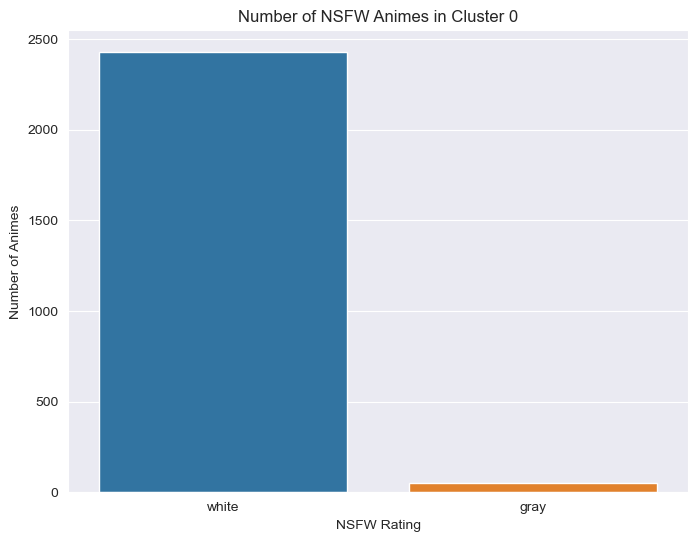

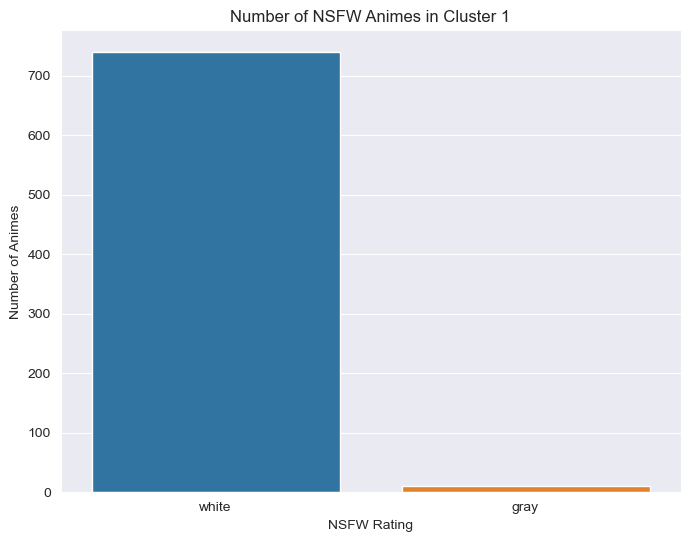

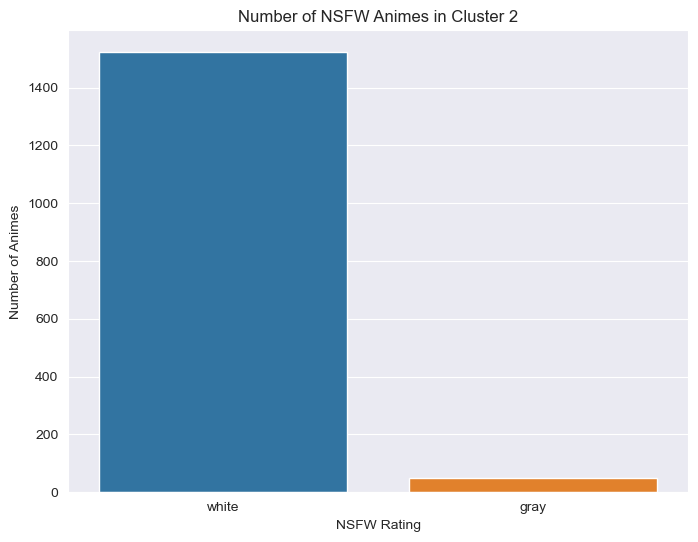

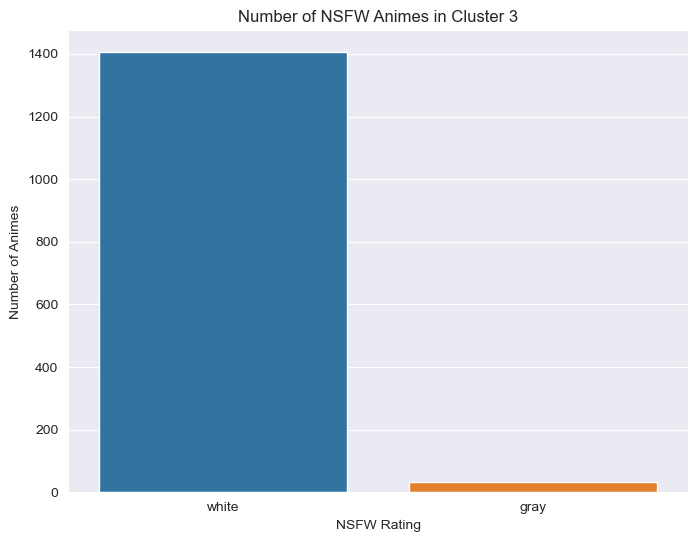

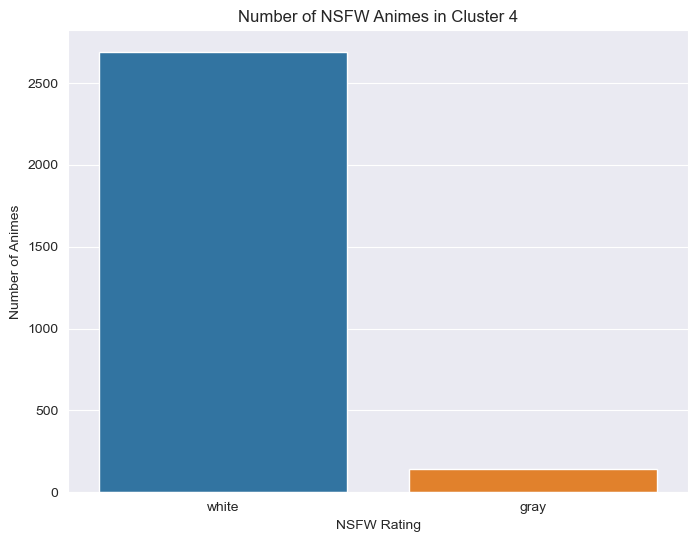

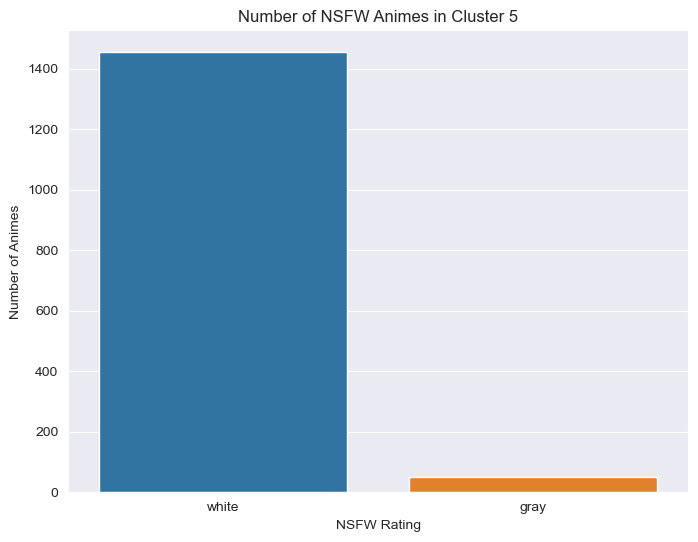

In [42]:
# create a new dataframe with the NSFW column and the cluster labels
df_nsfw = pd.read_csv('anime_details_clustered.csv', usecols=['nsfw', 'cluster'])

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_nsfw[df_nsfw['cluster'] == i]

    # count the number of NSFW animes in each cluster
    nsfw_counts = df_cluster['nsfw'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(8,6))
    sb.barplot(x=nsfw_counts.index, y=nsfw_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of NSFW Animes in Cluster {}'.format(i))
    plt.xlabel('NSFW Rating')
    plt.ylabel('Number of Animes')

# Analysis of Cluster VS NSFW
* The Clustering is not based on whether the anime is NSFW or not

# Cluster VS Media Type

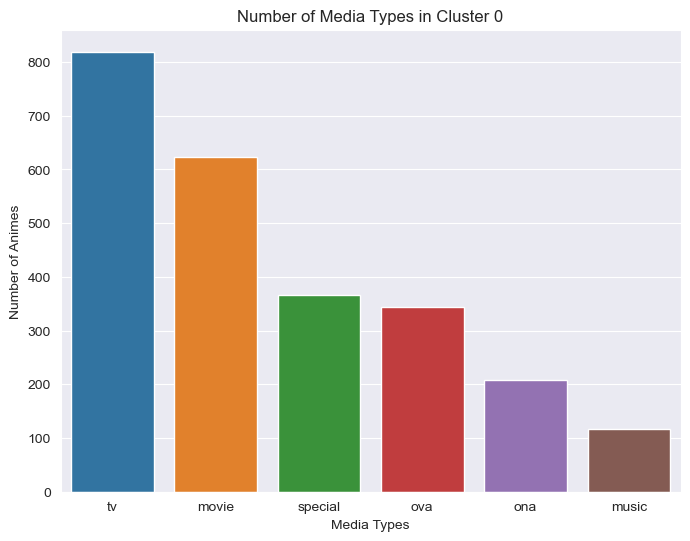

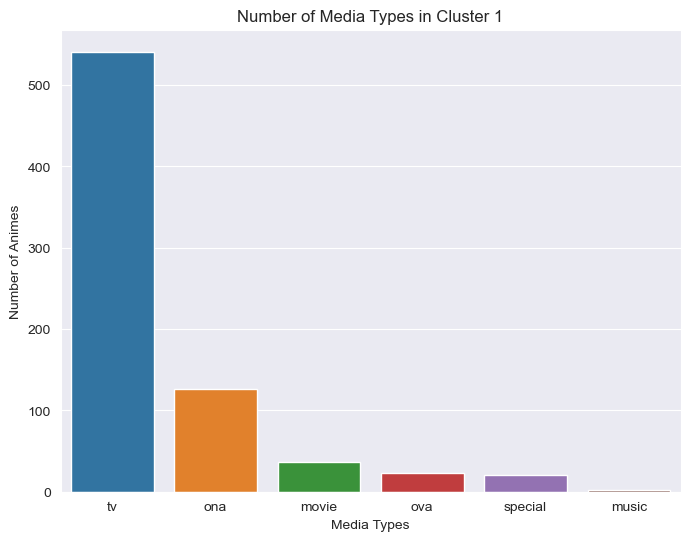

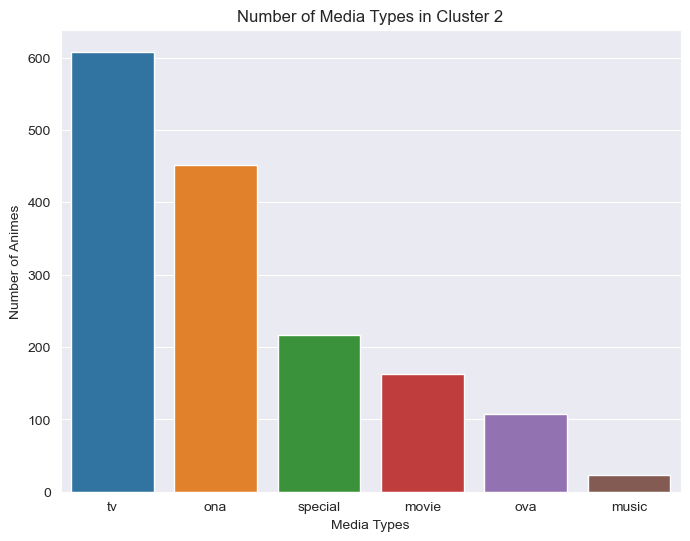

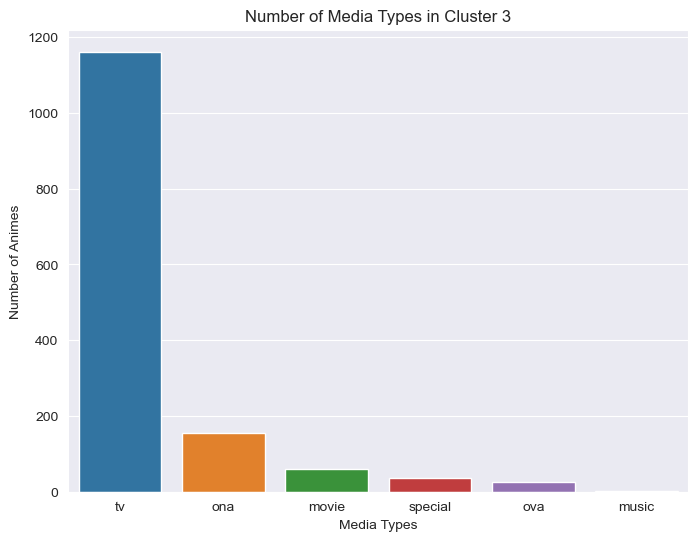

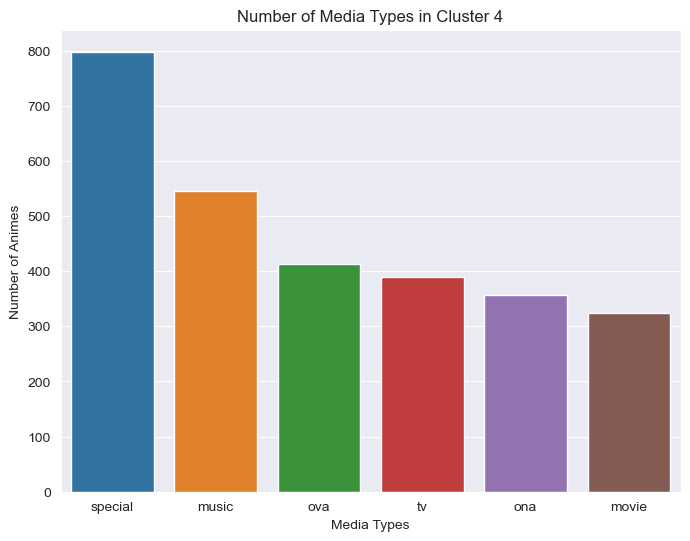

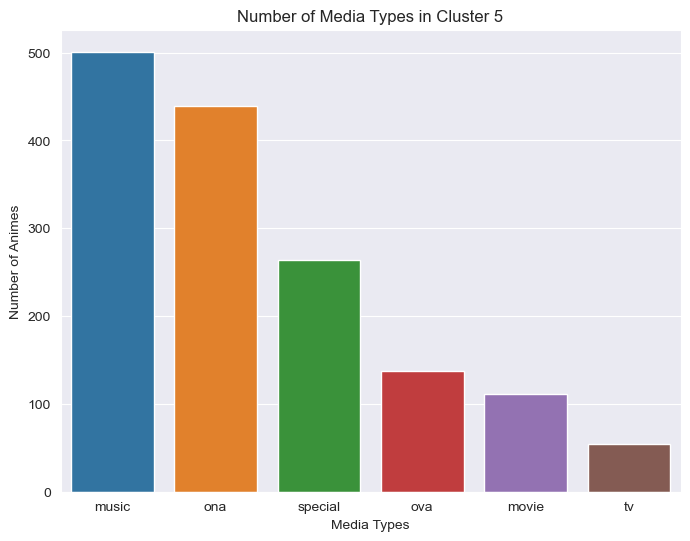

In [44]:
# create a new dataframe with the Media Type column and the cluster labels
df_media = pd.read_csv('anime_details_clustered.csv', usecols=['media_type', 'cluster'])

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_media[df_media['cluster'] == i]

    # count the number of Media animes in each cluster
    media_counts = df_cluster['media_type'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(8,6))
    sb.barplot(x=media_counts.index, y=media_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of Media Types in Cluster {}'.format(i))
    plt.xlabel('Media Types')
    plt.ylabel('Number of Animes')

# Visualisation of Cluster VS Media_Type
* Cluster 0 contains more animes that have TV and Movie as the media type
* Cluster 1 contains more animes that have TV as the media type
* Cluster 2 contains more animes that have TV and ONA as the media type
* Cluster 3 contains more animes that have TV as the media type
* Cluster 4 contains more animes that have Special and Music as the media type
* Cluster 5 contains more animes that have Music and ONA as the media type

# Analysis of Cluster VS Media_Type
* Animes that have movies as the media type generally have higher watch_rate and mean score according to the Cluster
* Animes that have TV as the media type have varying watch_rate and mean score according to the Cluster
* Animes with ONA as the media type have a average to high watch_rate and low to average mean score according to the Cluster
* Animes with Music as the media type have a high watch_rate but low mean score according to the Cluster

# Cluster VS Source_Type

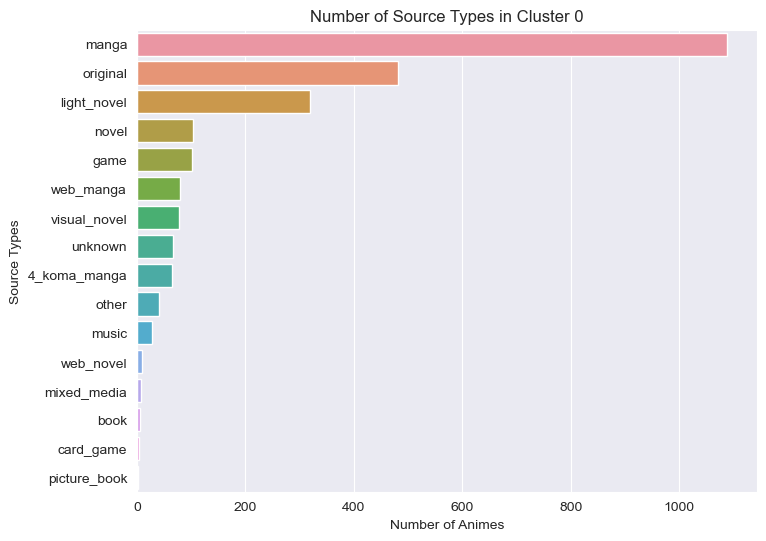

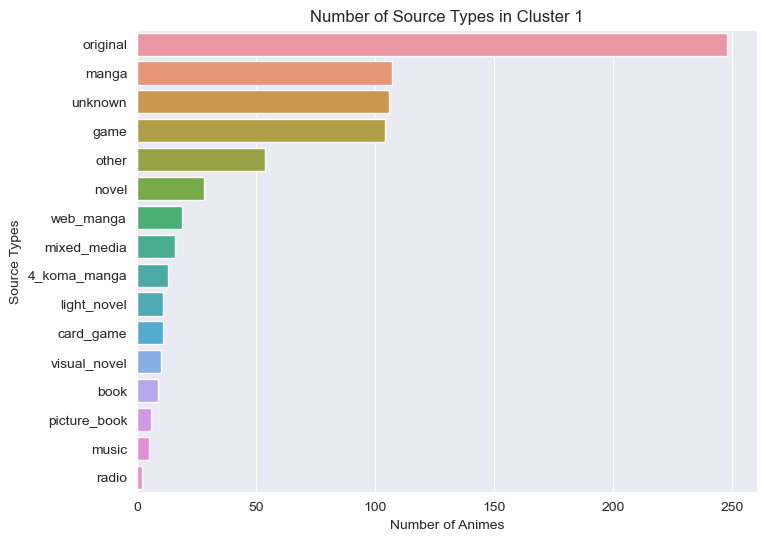

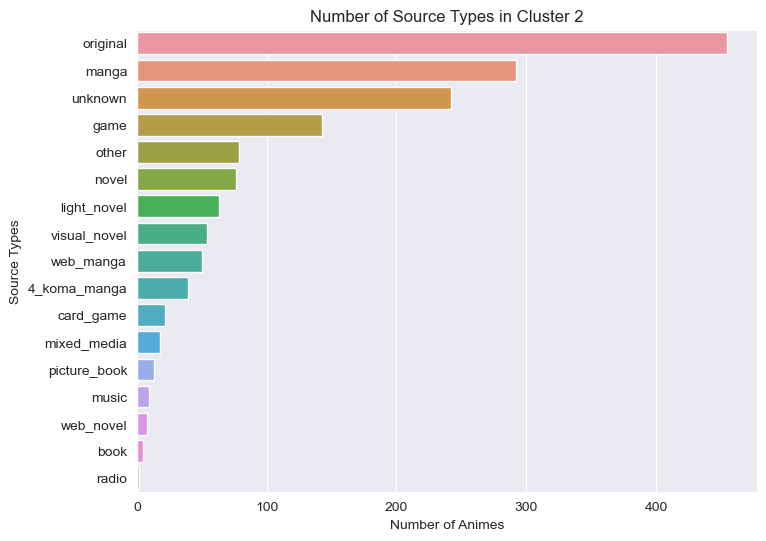

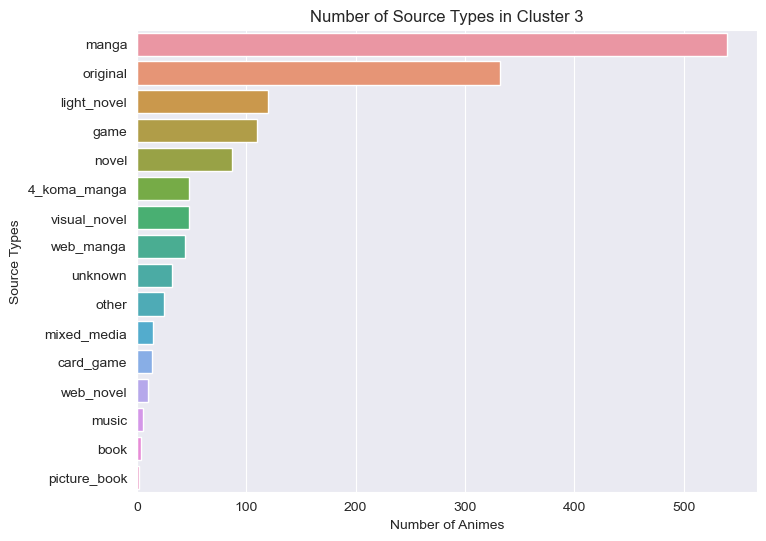

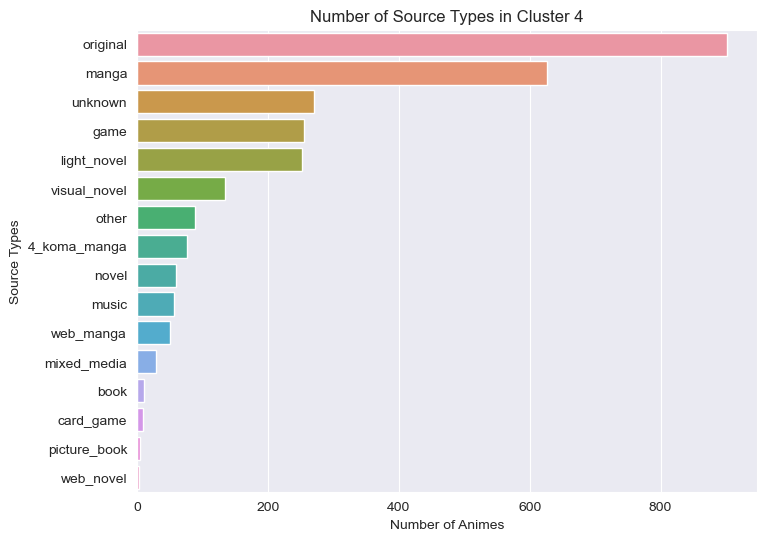

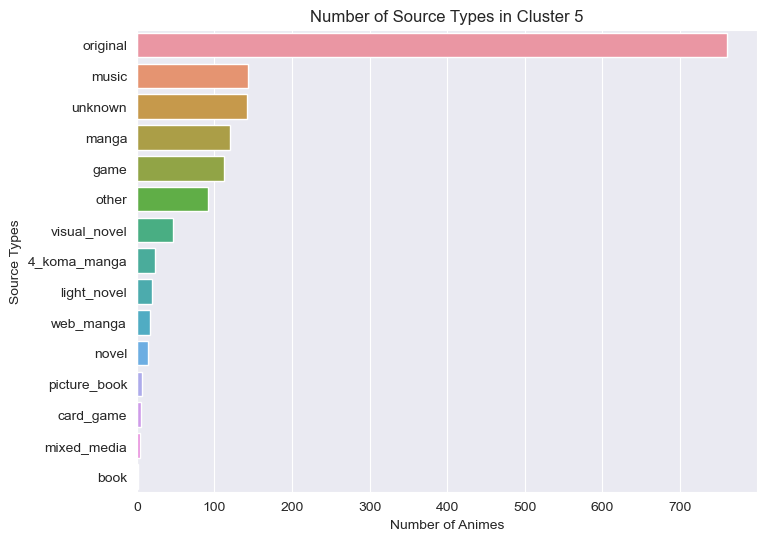

In [53]:
# create a new dataframe with the Source Type column and the cluster labels
df_source = pd.read_csv('anime_details_clustered.csv', usecols=['source', 'cluster'])

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_source[df_source['cluster'] == i]

    # count the number of Source type animes in each cluster
    source_counts = df_cluster['source'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(8,6))
    sb.barplot(y=source_counts.index, x=source_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of Source Types in Cluster {}'.format(i))
    plt.ylabel('Source Types')
    plt.xlabel('Number of Animes')

# Analysis of Cluster VS Source Type
* Cluster 0 and 3 contains more animes that was adapted from Manga, which explains the higher watch_rate and mean score according to the Cluster
* Cluster 1, 2, 4 and 5 contains more animes that was original which explains the varying watch_rate and low to slightly above average mean score according to the Cluster
* Cluster 2 and 4 also contains some animes that was adapted from Manga which explains why there is a slightly higher watch_rate and mean score according to the Cluster

# Cluster VS Ratings

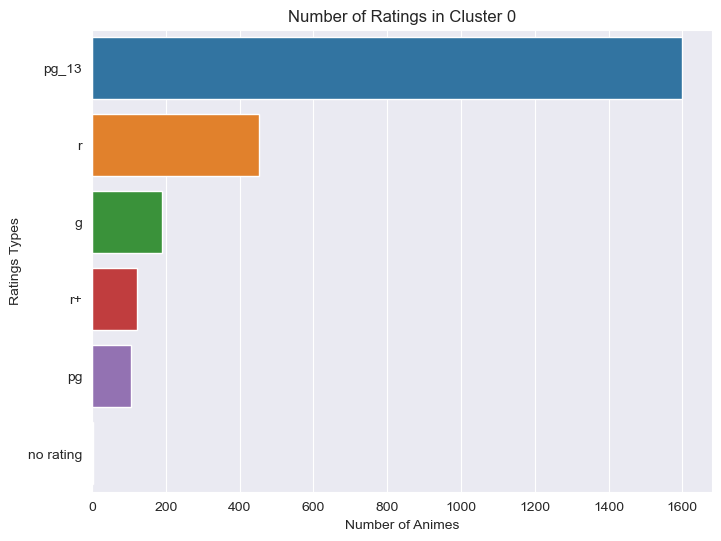

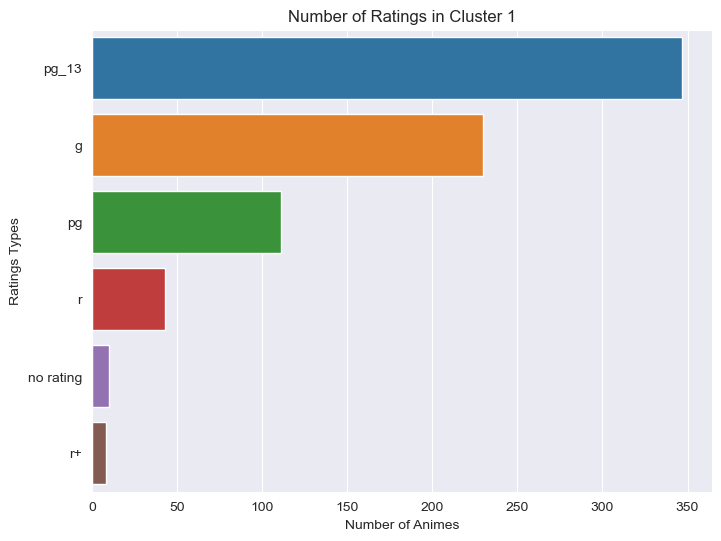

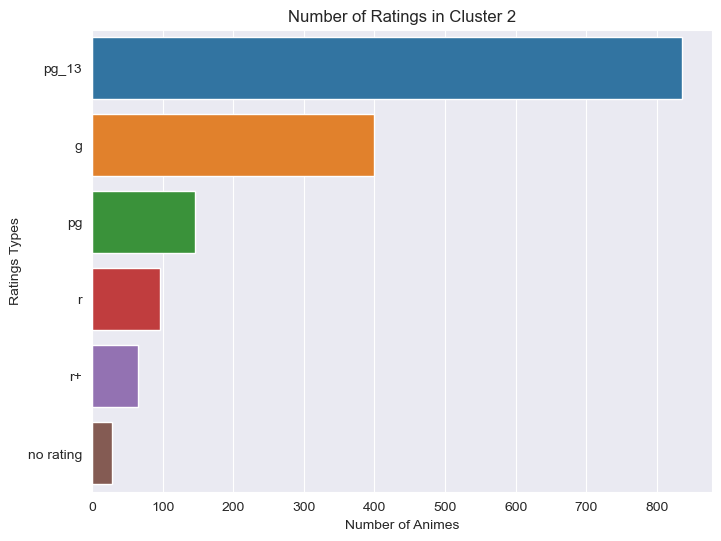

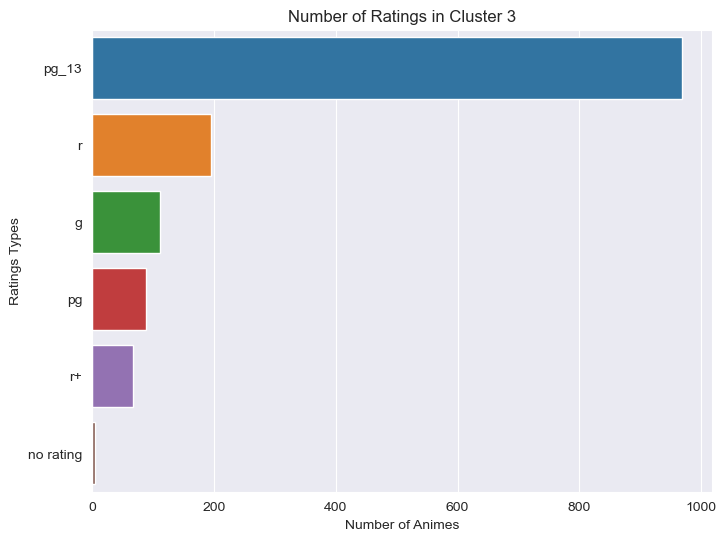

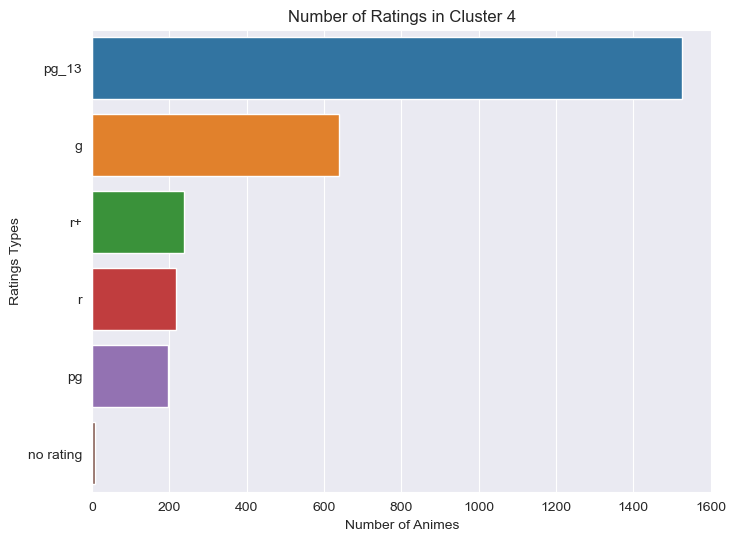

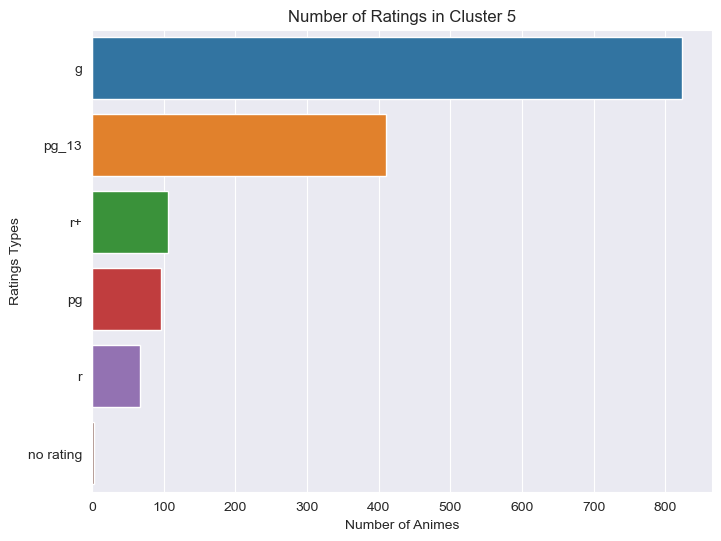

In [52]:
# create a new dataframe with the Ratings Type column and the cluster labels
df_ratings = pd.read_csv('anime_details_clustered.csv', usecols=['rating', 'cluster'])

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_ratings[df_ratings['cluster'] == i]

    # count the number of Ratings animes in each cluster
    ratings_counts = df_cluster['rating'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(8,6))
    sb.barplot(y=ratings_counts.index, x=ratings_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of Ratings in Cluster {}'.format(i))
    plt.ylabel('Ratings Types')
    plt.xlabel('Number of Animes')

# Visualisation of Cluster VS Ratings
* Cluster 0, 1, 2, 3 and 4 have the most animes with ratings of PG13
* Cluster 5 has the most animes with ratings of G
* Cluster 0 and 3 have quite a number of animes with ratings of R

# Analysis of Cluster VS Ratings
* R rated animes have higher watch_rate and mean score according to the Cluster
* G rated animes have higher watch_rate but lower mean score according to the Cluster
* PG13 rated animes have a range of watch_rate and mean score

# Cluster VS Season

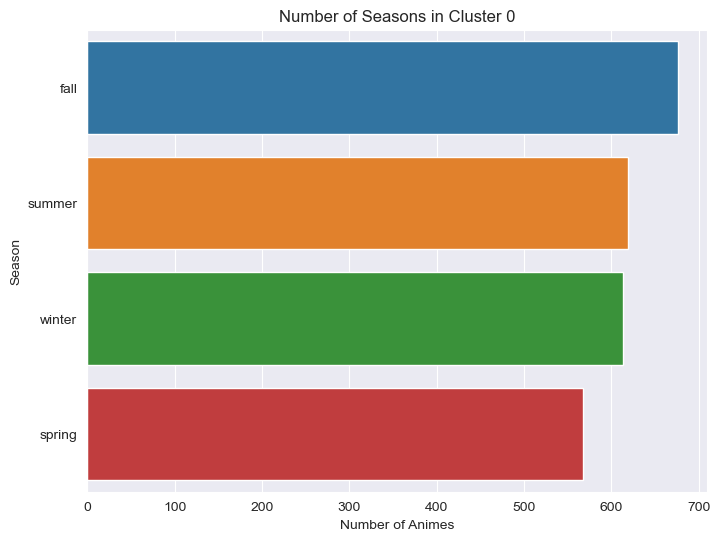

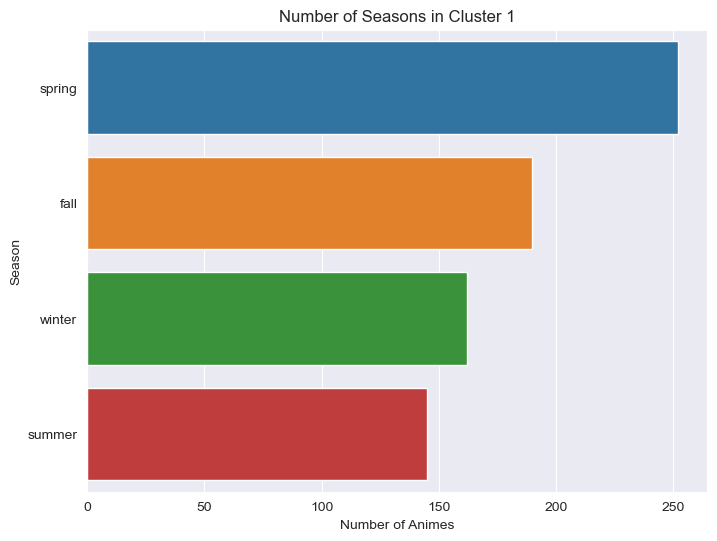

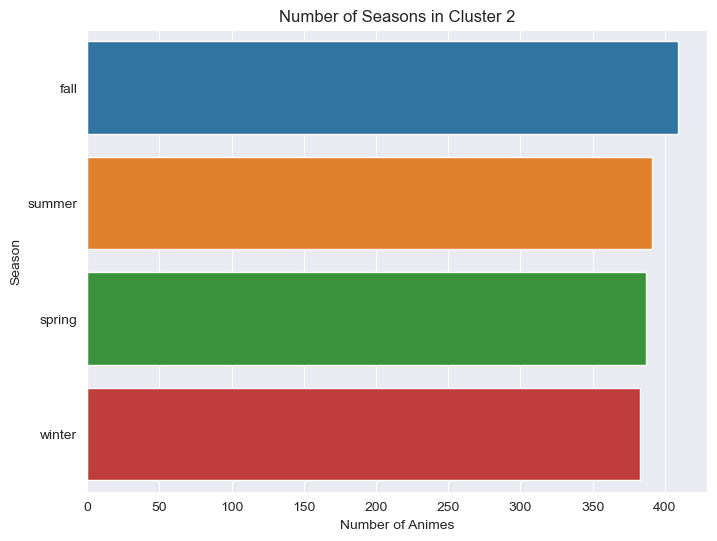

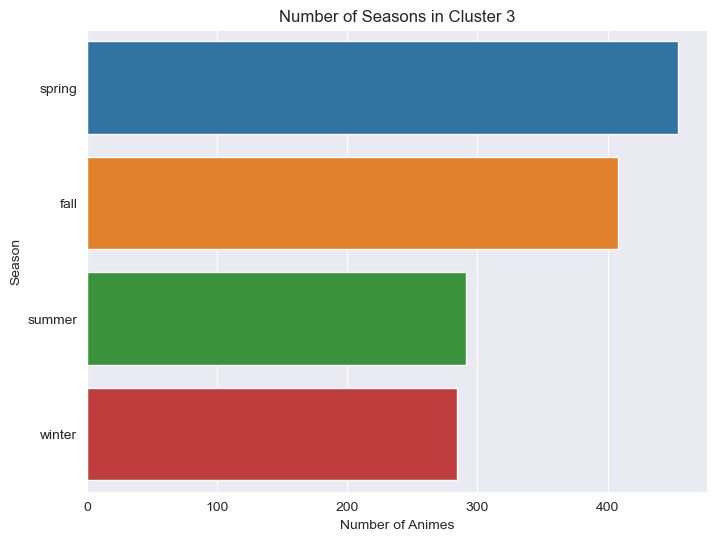

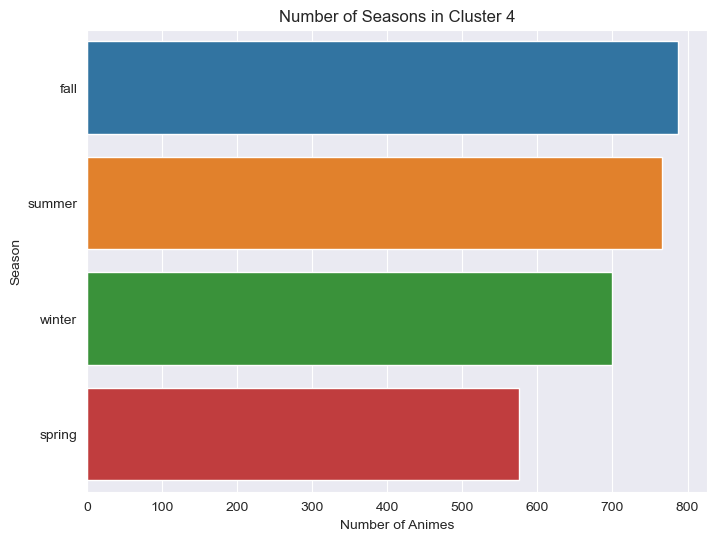

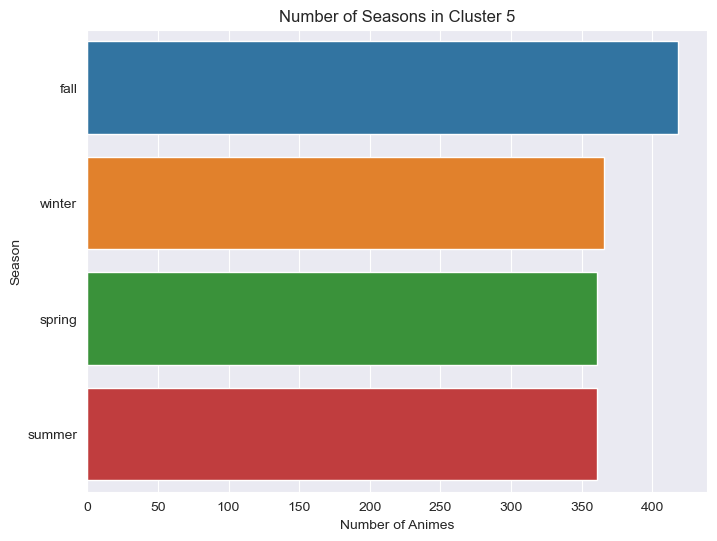

In [56]:
# create a new dataframe with the Season column and the cluster labels
df_season = pd.read_csv('anime_details_clustered.csv', usecols=['start_season.season', 'cluster'])

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_season[df_season['cluster'] == i]

    # count the number of season animes in each cluster
    season_counts = df_cluster['start_season.season'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(8,6))
    sb.barplot(y=season_counts.index, x=season_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of Seasons in Cluster {}'.format(i))
    plt.ylabel('Season')
    plt.xlabel('Number of Animes')

# Analysis of Cluster VS Season
* Cluster 0, 2 and 5 have around the same distribution of anime based on seasons
* Cluster 1 and 3 have the most anime from Spring season
* Cluster 4 have the least anime from Spring season
* The season of the anime does not affect the Cluster

# Cluster VS Year

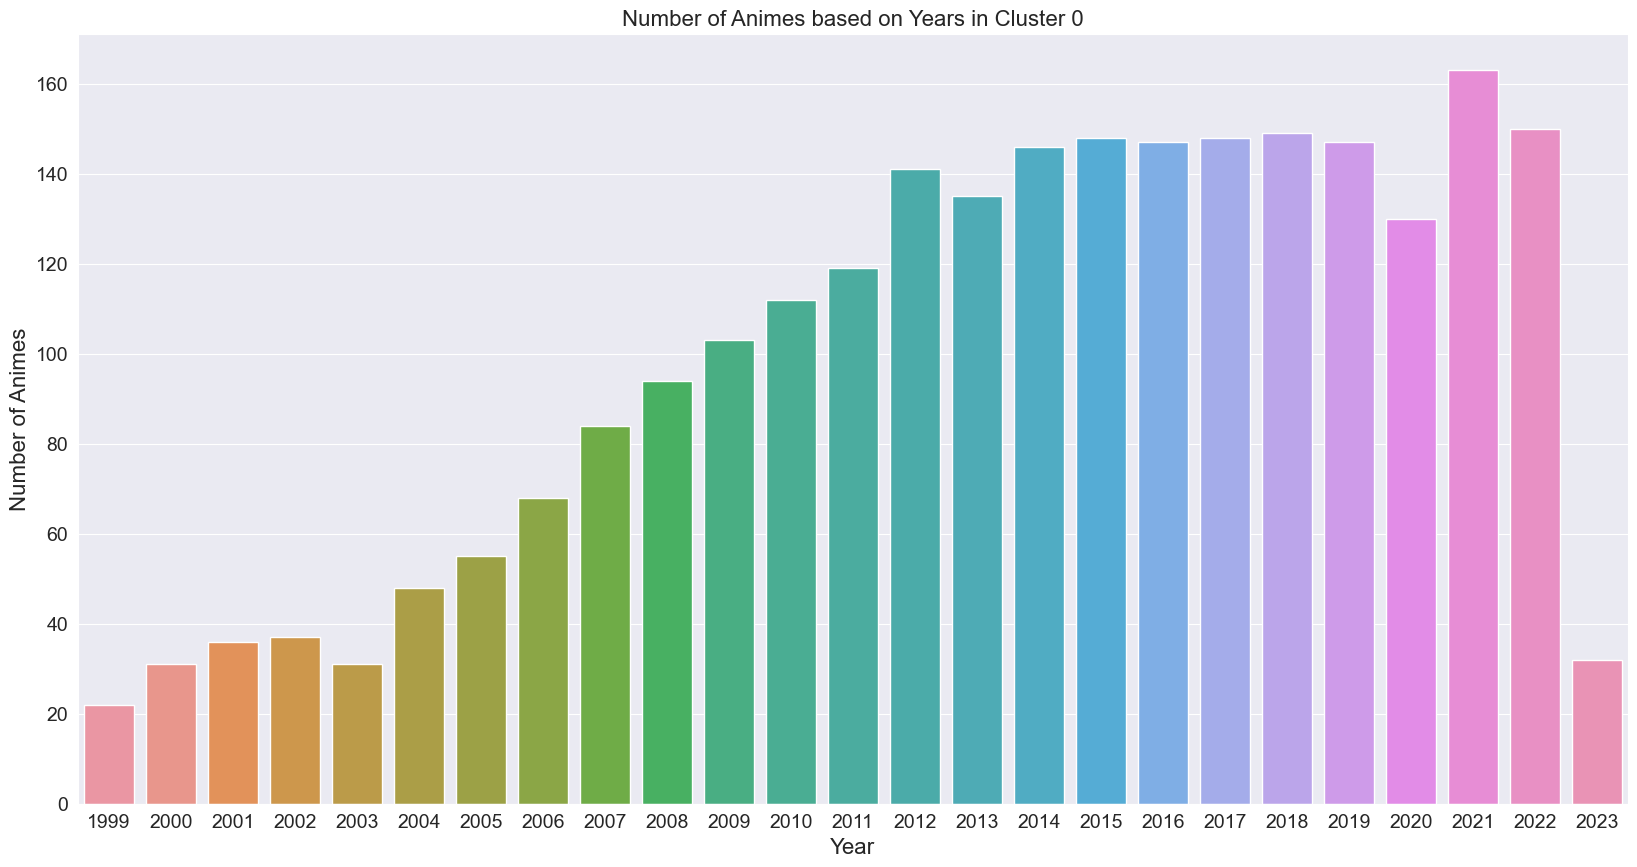

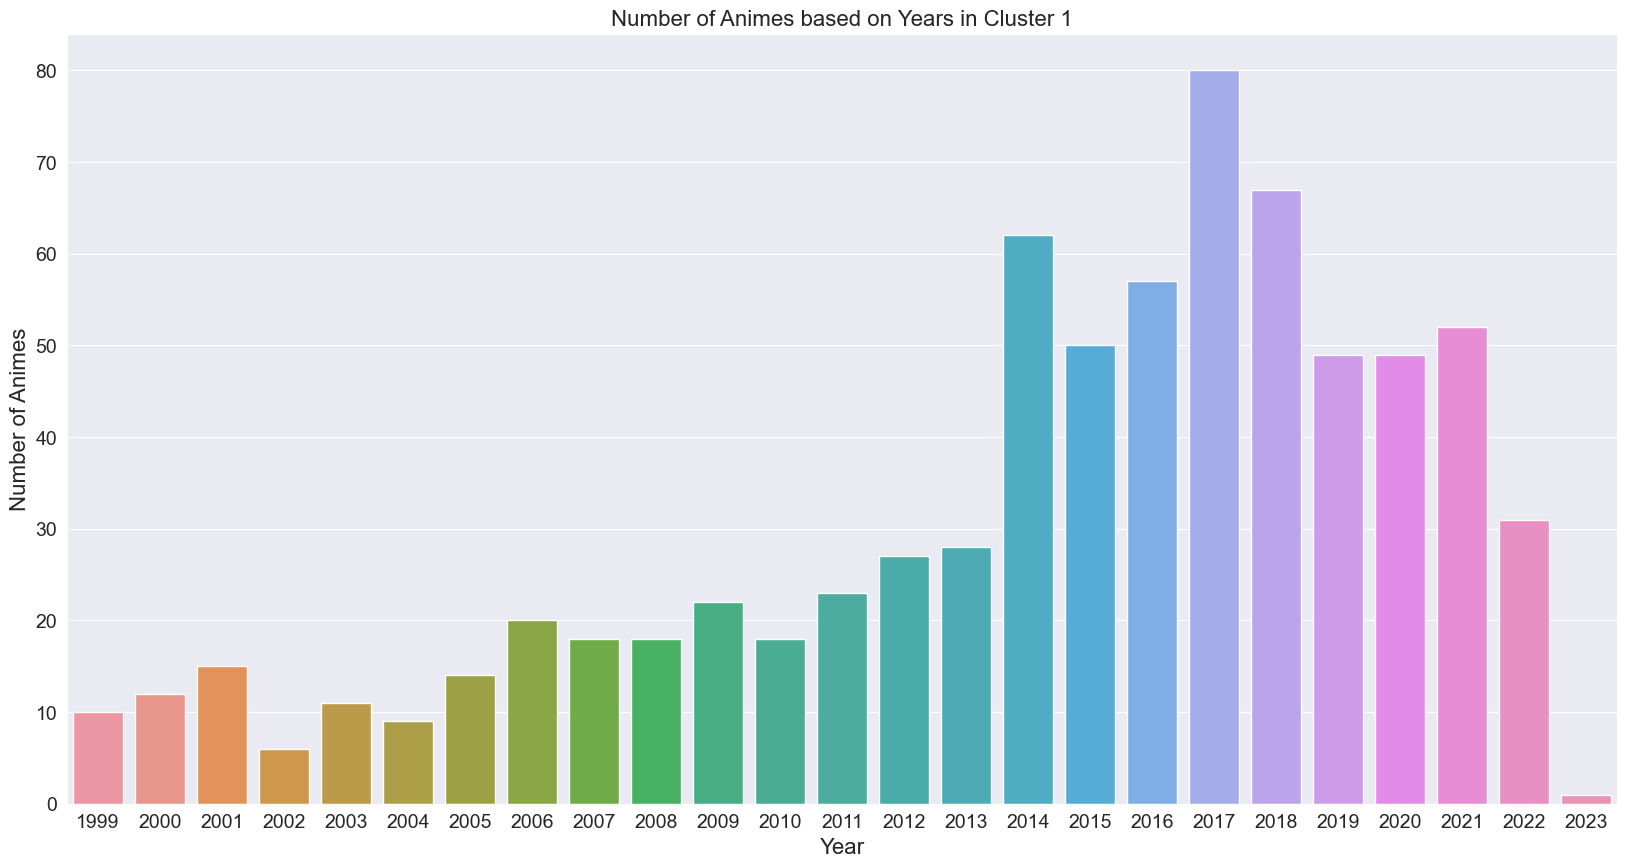

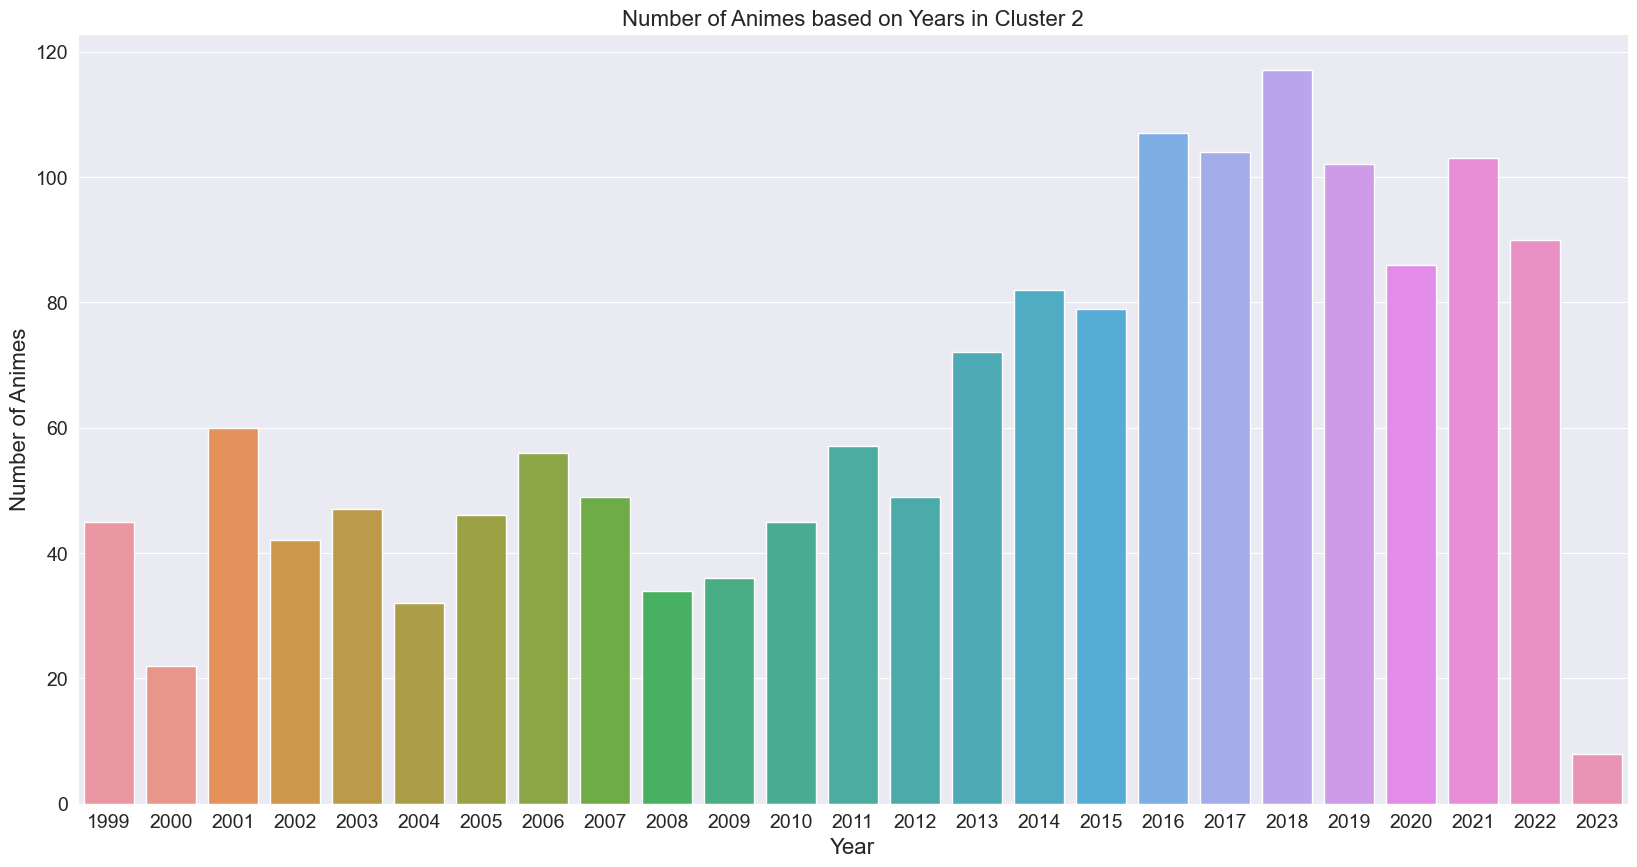

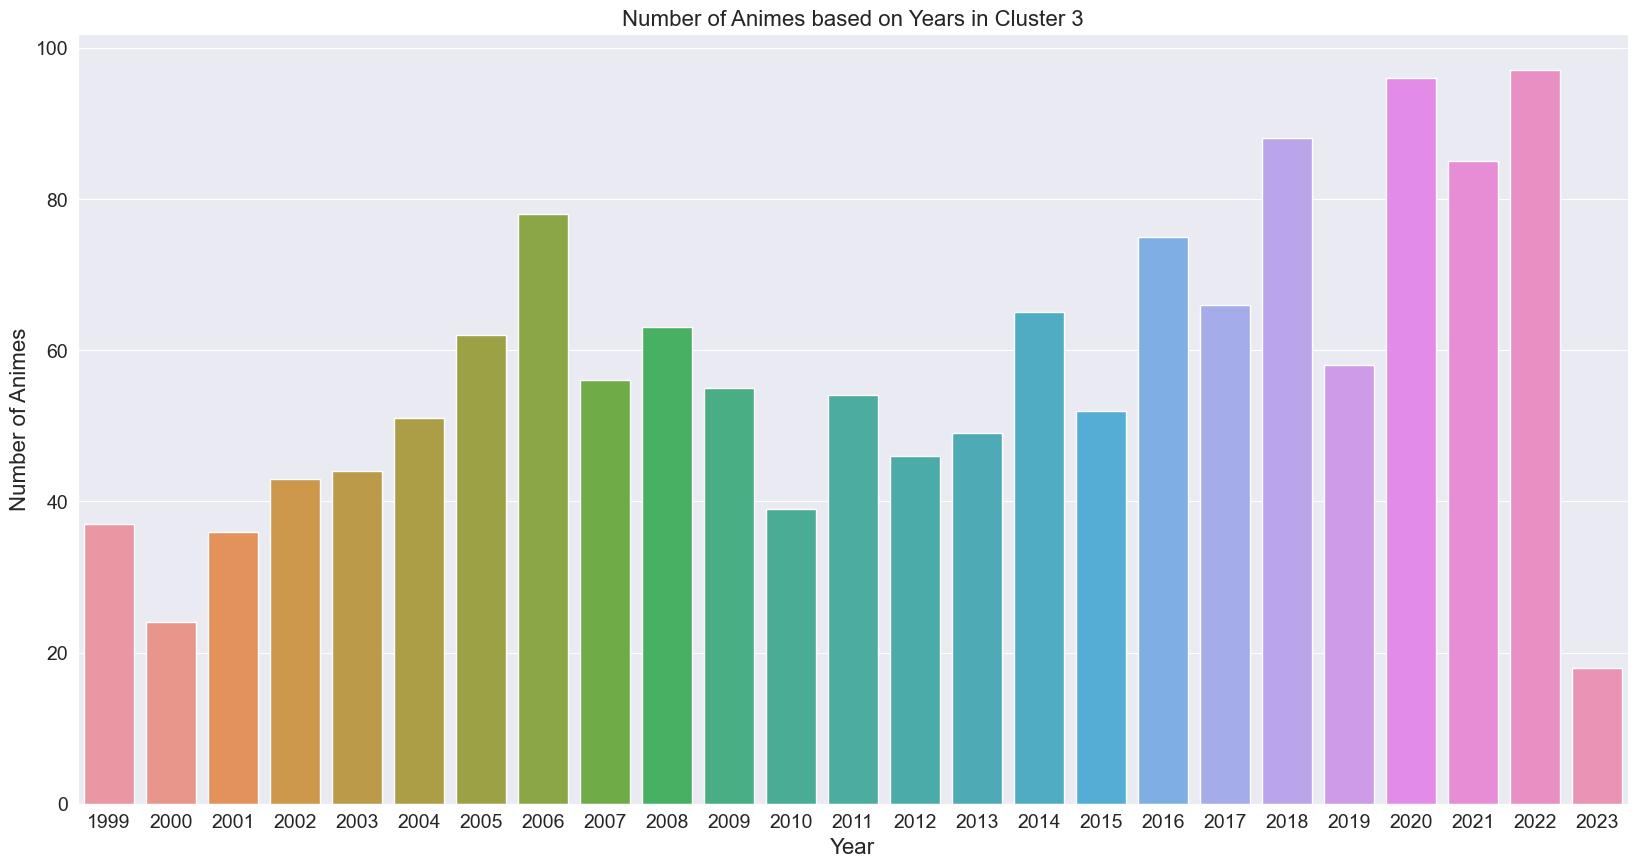

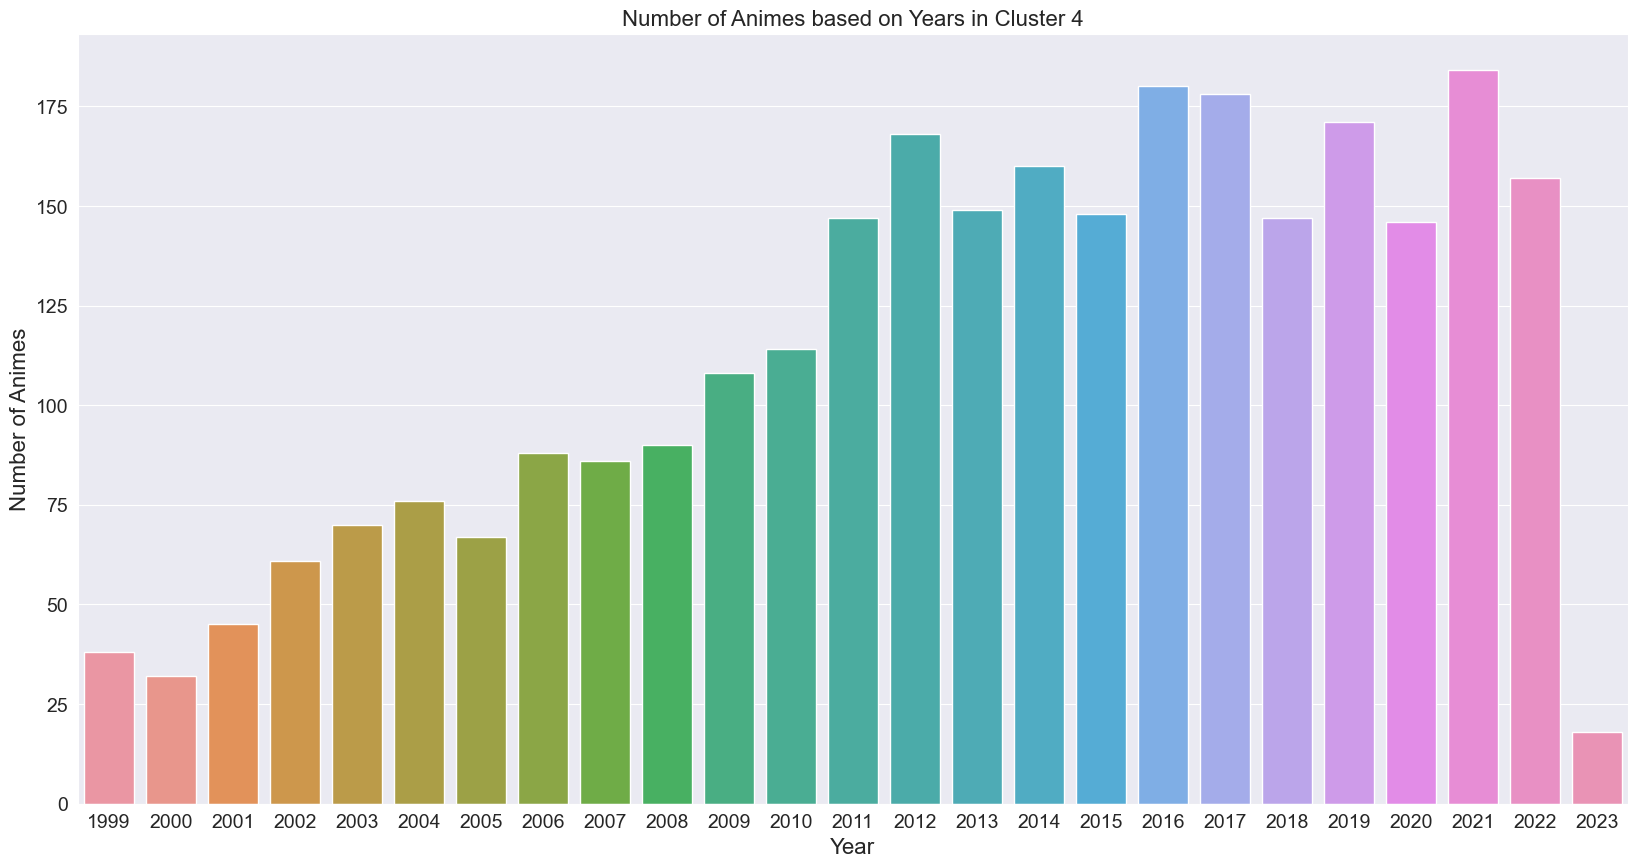

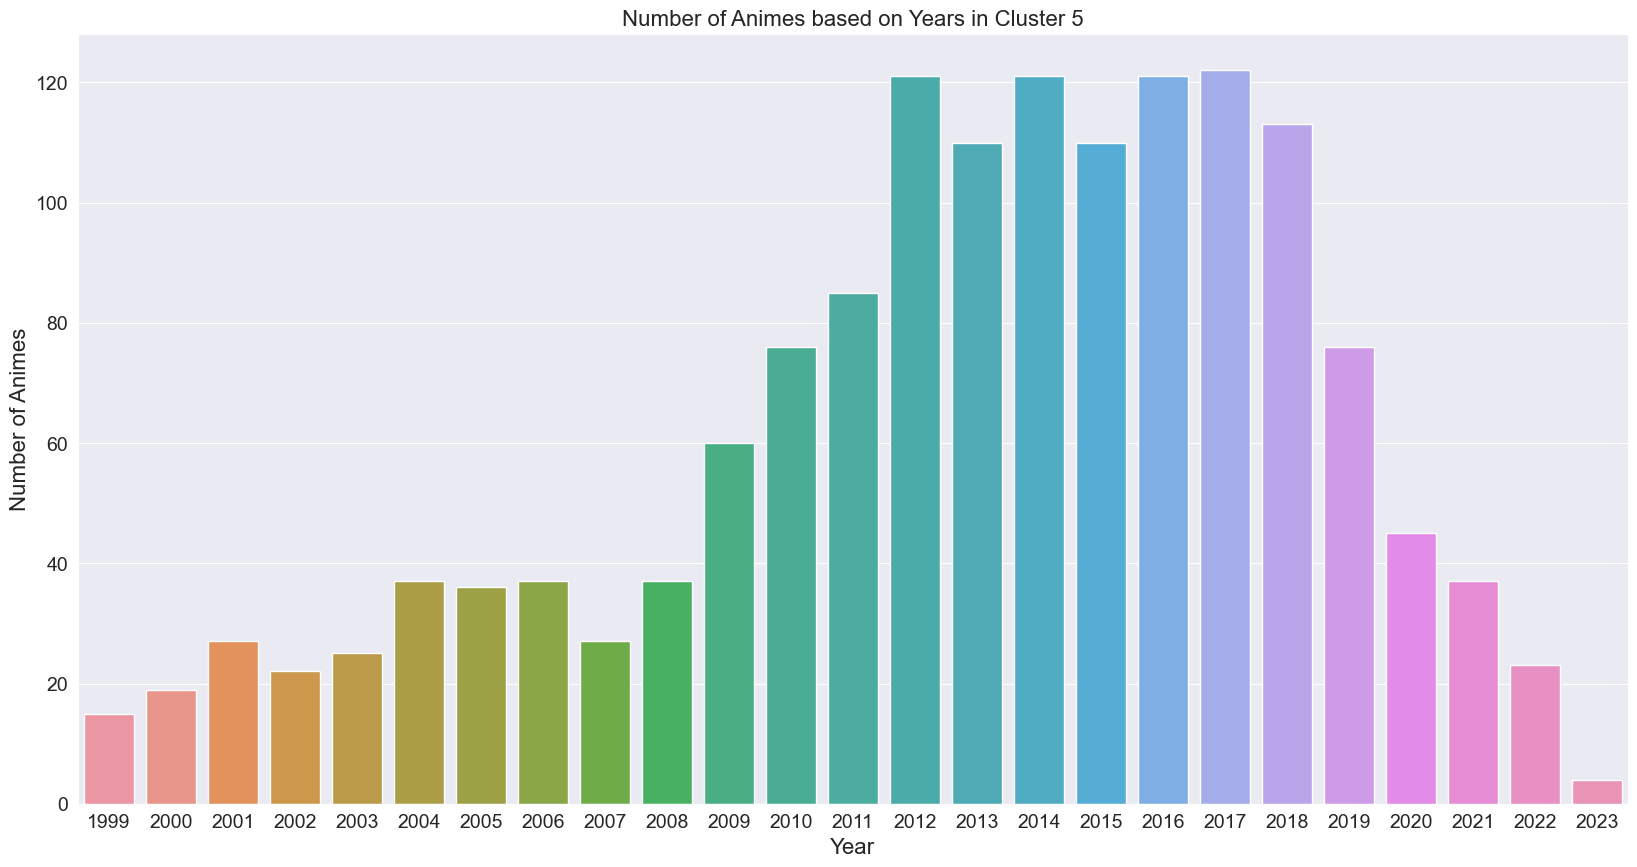

In [63]:
# create a new dataframe with the year column and the cluster labels
df_year = pd.read_csv('anime_details_clustered.csv', usecols=['start_season.year', 'cluster'])
df_year['start_season.year'] = df_year['start_season.year'].astype(int)

# iterate over all clusters
for i in range(6):
    # filter the dataframe by cluster
    df_cluster = df_year[df_year['cluster'] == i]

    # count the number of year animes in each cluster
    year_counts = df_cluster['start_season.year'].value_counts()

    # create the bar plot with seaborn
    plt.figure(figsize=(20, 10))
    sb.barplot(x=year_counts.index, y=year_counts.values)
    sb.set_style("darkgrid")
    plt.title('Number of Animes based on Years in Cluster {}'.format(i), fontsize=16)
    plt.ylabel('Number of Animes', fontsize=16)
    plt.xlabel('Year', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

# Visualisation of Cluster VS Year
* Cluster 0 contains animes mostly from 2021 to 2022
* Cluster 1 contains animes mostly from 2017
* Cluster 2 contains animes mostly from 2016 to 2018
* Cluster 3 contains animes mostly from 2020 to 2022
* Cluster 4 contains animes mostly from 2016, 2017 and 2019
* Cluster 5 contains animes mostly from 2012 to 2017

# Analysis of Cluster VS Year
* More recent animes i.e. 2020 to 2022 has higher watch_rate and mean score 
